# Porto Seguro’s Safe Driver Prediction

**The following project was sourced from a Kaggle Competition and adapted for this project.**

For this project, we will be walking though a data exploration of Porto Seguro's auto insurance claim data in order to create an accurate prediction model that predicts the probability that drivers will initiate an auto insurance claim in the next year. We want to ultimately present this model to Porto Seguro in order to offer a powerful and price-effective method to tailor their prices to their customers.

We are using Porto Seguro's published data from the following Kaggle competition. Below is the link to the original data source.
*https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/overview*

And also below is the link of our colab notebook.
*https://colab.research.google.com/drive/11Wsmn_1NKfoZfLJDig4L_zsaT4nE-VOk?usp=sharing*

***Important Note: The date provided by Porto Seguro does not include a dictionary of the feature definitions. Therefore, throughout the project, we will refer to them using the original name given in the dataset. There are 2 datasets provided (test and train), we only use the training dataset to train and validate the model and then use the test dataset to predict.***

Our data process includes the following steps:
1. Data Wrangling
2. Exploratory Data Analysis
3. Feature Engineering
4. Modeling Construction
5. Performance Analysis
6. Predictions

The following topics will be covered:
* Correlation Matrix
* Grid Search
* PCA 
* Target Encoding
* XGB Classifier model
* Gini Cofficient
* Polynomial Features
* Simple Imputer

Because we have limited knowledge about the definition of the features provided in the dataset, we are using the original feature names. Below are the features from the dataset: 
id, 
ps_ind_01, 
ps_ind_02_cat, 
ps_ind_03, 
ps_ind_04_cat, 
ps_ind_05_cat, 
ps_ind_06_bin, 
ps_ind_07_bin, 
ps_ind_08_bin, 
ps_ind_09_bin, 
ps_ind_10_bin, 
ps_ind_11_bin, 
ps_ind_12_bin, 
ps_ind_13_bin, 
ps_ind_14, 
ps_ind_15, 
ps_ind_16_bin, 
ps_ind_17_bin, 
ps_ind_18_bin, 
ps_reg_01, 
ps_reg_02, 
ps_reg_03, 
ps_car_01_cat, 
ps_car_02_cat, 
ps_car_03_cat, 
ps_car_04_cat, 
ps_car_05_cat, 
ps_car_06_cat, 
ps_car_07_cat, 
ps_car_08_cat, 
ps_car_09_cat, 
ps_car_10_cat, 
ps_car_11_cat, 
ps_car_11, 
ps_car_12, 
ps_car_13, 
ps_car_14, 
ps_car_15, 
ps_calc_01, 
ps_calc_02, 
ps_calc_03, 
ps_calc_04, 
ps_calc_05, 
ps_calc_06, 
ps_calc_07, 
ps_calc_08, 
ps_calc_09, 
ps_calc_10, 
ps_calc_11, 
ps_calc_12, 
ps_calc_13, 
ps_calc_14, 
ps_calc_15_bin, 
ps_calc_16_bin, 
ps_calc_17_bin, 
ps_calc_18_bin, 
ps_calc_19_bin, 
ps_calc_20_bin

# Introduction


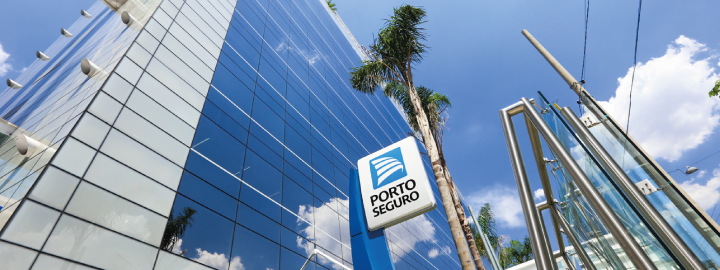

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill especially if you are a good driver and have been cautious on the road for years. Porto Seguro is one of Brazil's largest auto insurance companies serving more than 18 million customers and their mission is to ensure that their customers are safe and protected without breaking the bank.
 
 
 
In this project, we will be exploring data that Porto Seguro provided in order to predict the probability that a driver will initiate an auto insurance claim in the next year. An accurate predictive model would allow Porto Seguro to manage risk and ensure that their customers are charged fairly. Inaccuracies in insurance company's claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones. Additionally, with an accurate prediction model Porto Seguro can gain the trust of their customers. An accurate prediction model will make the insurance coverage more accessible to more drivers.


The value proposition of the analysis we have conducted is that accurate models allow customers to be fairly charged based on whether they are a safe driver which would allow insurance companies to manage the risk of their customers. Additionally, operating machine learning algorithms is a cost-effective method to access their target customers.

# Data Wrangling

In this section, we will be processing the data in order to remove errors and set up the dataframe to make the data more digestible and easy to analyze. Especially because the data that Porto Seguro has provided does not include a dictionary of the features or columns, it is especially important that throughout the data exploration process, we clearly distinguish the features.


First we are going to install the appropriate imports and set up our work environment. We are connecting the Google Collab Notebook to the Kaggle dataset.

In [69]:
# To mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [72]:
# Read the file (kaggle.json) 
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [73]:
# Dataset downloaded
!!kaggle competitions download -c porto-seguro-safe-driver-prediction

['porto-seguro-safe-driver-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)']

In [74]:
# Unzip folder in Colab content folder
!unzip /content/porto-seguro-safe-driver-prediction.zip

Archive:  /content/porto-seguro-safe-driver-prediction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                y

replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: train.csv               


In [75]:
# Package imported
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [76]:
# Read the train and test csv files
train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

After importing the packages and reading our training and test files, it is important to understand the data types and format. We recognized that there were several columns with missing data. Therefore, printing out and analyzing the columns would allow us to figure out the appropriate strategy to wrangle and clean the data for analysis and visualization.

In [77]:
# Print the missing percent of data in all the columns for the train data.
# The columns with the most missing percent are ps_car_03_cat(69.09%)、ps_car_05_cat(44.78%).
# Since the dataset has been desensitized to protect the clients privacy, it is difficult to fill the missing part of these columns.
# However, we will use the 'mean' and mode SimpleImputer Strategy to fill the missing data in the following parts.
na_list=[]
for col in train_df.columns:
    missing = sum(train_df[col] == -1)
    if round(missing*100/len(train_df),2)> 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(train_df),2)}%)')

ps_ind_02_cat:216(0.04%)
ps_ind_04_cat:83(0.01%)
ps_ind_05_cat:5809(0.98%)
ps_reg_03:107772(18.11%)
ps_car_01_cat:107(0.02%)
ps_car_03_cat:411231(69.09%)
ps_car_05_cat:266551(44.78%)
ps_car_07_cat:11489(1.93%)
ps_car_09_cat:569(0.1%)
ps_car_14:42620(7.16%)


In [78]:
# Print the missing percent of date in all the columsn for the test data.
# The columns with the most missing percent are ps_car_05_cat:400359(44.84%), ps_car_03_cat:616911(69.1%).
# Since the dataset has been desensitized to protect the clients privacy, it is difficult to fill the missing part of these columns.
# However, we will use the 'mean' and mode SimpleImputer Strategy to fill the missing data in the following parts.
na_list=[]
for col in test_df.columns:
    missing = sum(test_df[col] == -1)
    if round(missing*100/len(test_df),2)> 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(test_df),2)}%)')

ps_ind_02_cat:307(0.03%)
ps_ind_04_cat:145(0.02%)
ps_ind_05_cat:8710(0.98%)
ps_reg_03:161684(18.11%)
ps_car_01_cat:160(0.02%)
ps_car_03_cat:616911(69.1%)
ps_car_05_cat:400359(44.84%)
ps_car_07_cat:17331(1.94%)
ps_car_09_cat:877(0.1%)
ps_car_14:63805(7.15%)


In [79]:
# view information about the train_df.
# We see that the columns ps_reg_01, ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03 are categorical variables. Therefore we will pay extra attention to these variables in the following section.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [80]:
# view information about the test_df.
# We see that the columns ps_reg_01, ps_reg_02, ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15, ps_calc_01, ps_calc_02, ps_calc_03 are categorical variables. 
# Therefore we will pay extra attention to these variables in the following section.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

In [81]:
# Observe the value range of each variable in the training dataset and testing dataset.
# We can notice that the value range between the test and training dataset are not significantly different which allows us to make predictions with the test dataset.

feat_num=[]
for i in train_df.columns[2:]:
  if not isinstance(train_df[i][0],float):
    print(i,"unique values count ---train:",len(train_df[i].unique()),"test:",len(test_df[i].unique()))
    print(train_df[i].unique())
    print(test_df[i].unique())
  else :
    feat_num.append(i)

ps_ind_01 unique values count ---train: 8 test: 8
[2 1 5 0 4 3 6 7]
[0 4 5 1 3 2 6 7]
ps_ind_02_cat unique values count ---train: 5 test: 5
[ 2  1  4  3 -1]
[ 1  2  3 -1  4]
ps_ind_03 unique values count ---train: 12 test: 12
[ 5  7  9  2  0  4  3  1 11  6  8 10]
[ 8  5  3  6  7  0  4  2  1  9 11 10]
ps_ind_04_cat unique values count ---train: 3 test: 3
[ 1  0 -1]
[ 1  0 -1]
ps_ind_05_cat unique values count ---train: 8 test: 8
[ 0  1  4  3  6  5 -1  2]
[ 0  4  6 -1  3  1  5  2]
ps_ind_06_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_07_bin unique values count ---train: 2 test: 2
[1 0]
[1 0]
ps_ind_08_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_09_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_10_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_11_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_12_bin unique values count ---train: 2 test: 2
[0 1]
[0 1]
ps_ind_13_bin unique values count ---train: 2 test: 2


In [82]:
# Print the described details of of all columns in the train dataset
train_df.describe()

id         target      ps_ind_01  ps_ind_02_cat  \
count  5.952120e+05  595212.000000  595212.000000  595212.000000   
mean   7.438036e+05       0.036448       1.900378       1.358943   
std    4.293678e+05       0.187401       1.983789       0.664594   
min    7.000000e+00       0.000000       0.000000      -1.000000   
25%    3.719915e+05       0.000000       0.000000       1.000000   
50%    7.435475e+05       0.000000       1.000000       1.000000   
75%    1.115549e+06       0.000000       3.000000       2.000000   
max    1.488027e+06       1.000000       7.000000       4.000000   

           ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  \
count  595212.000000  595212.000000  595212.000000  595212.000000   
mean        4.423318       0.416794       0.405188       0.393742   
std         2.699902       0.493311       1.350642       0.488579   
min         0.000000      -1.000000      -1.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         4.000000       0.000000       0.000000       0.000000   
75%         6.000000       1.000000       0.000000       1.000000   
max        11.000000       1.000000       6.000000       1.000000   

       ps_ind_07_bin  ps_ind_08_bin  ...     ps_calc_11     ps_calc_12  \
count  595212.000000  595212.000000  ...  595212.000000  595212.000000   
mean        0.257033       0.163921  ...       5.441382       1.441918   
std         0.436998       0.370205  ...       2.332871       1.202963   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         1.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      19.000000      10.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  595212.000000  595212.000000   595212.000000   595212.000000   
mean        2.872288       7.539026        0.122427        0.627840   
std         1.694887       2.746652        0.327779        0.483381   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        13.000000      23.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   595212.000000   595212.000000   595212.000000   595212.000000  
mean         0.554182        0.287182        0.349024        0.153318  
std          0.497056        0.452447        0.476662        0.360295  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 59 columns]

In [83]:
# Print the described details of of all columns in the test dataset
test_df.describe()

id      ps_ind_01  ps_ind_02_cat      ps_ind_03  \
count  8.928160e+05  892816.000000  892816.000000  892816.000000   
mean   7.441535e+05       1.902371       1.358613       4.413734   
std    4.296830e+05       1.986503       0.663002       2.700149   
min    0.000000e+00       0.000000      -1.000000       0.000000   
25%    3.720218e+05       0.000000       1.000000       2.000000   
50%    7.443070e+05       1.000000       1.000000       4.000000   
75%    1.116308e+06       3.000000       2.000000       6.000000   
max    1.488026e+06       7.000000       4.000000      11.000000   

       ps_ind_04_cat  ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  \
count  892816.000000  892816.000000  892816.000000  892816.000000   
mean        0.417361       0.408132       0.393246       0.257191   
std         0.493453       1.355068       0.488471       0.437086   
min        -1.000000      -1.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         1.000000       6.000000       1.000000       1.000000   

       ps_ind_08_bin  ps_ind_09_bin  ...     ps_calc_11     ps_calc_12  \
count  892816.000000  892816.000000  ...  892816.000000  892816.000000   
mean        0.163659       0.185905  ...       5.438478       1.440265   
std         0.369966       0.389030  ...       2.330081       1.200620   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       4.000000       1.000000   
50%         0.000000       0.000000  ...       5.000000       1.000000   
75%         0.000000       0.000000  ...       7.000000       2.000000   
max         1.000000       1.000000  ...      20.000000      11.000000   

          ps_calc_13     ps_calc_14  ps_calc_15_bin  ps_calc_16_bin  \
count  892816.000000  892816.000000   892816.000000   892816.000000   
mean        2.875013       7.540367        0.123720        0.627756   
std         1.694072       2.745882        0.329262        0.483403   
min         0.000000       0.000000        0.000000        0.000000   
25%         2.000000       6.000000        0.000000        0.000000   
50%         3.000000       7.000000        0.000000        1.000000   
75%         4.000000       9.000000        0.000000        1.000000   
max        15.000000      28.000000        1.000000        1.000000   

       ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  ps_calc_20_bin  
count   892816.000000   892816.000000   892816.000000   892816.000000  
mean         0.554660        0.287796        0.349344        0.152428  
std          0.497004        0.452736        0.476763        0.359435  
min          0.000000        0.000000        0.000000        0.000000  
25%          0.000000        0.000000        0.000000        0.000000  
50%          1.000000        0.000000        0.000000        0.000000  
75%          1.000000        1.000000        1.000000        0.000000  
max          1.000000        1.000000        1.000000        1.000000  

[8 rows x 58 columns]

Graphing the class distribution allows us to visualize the distribution and understand the balance of the data. We can tell from the graph that the class distribution is very imbalanced and needs to be fixed using a balancing method.

Text(0, 0.5, 'Number Data Points')

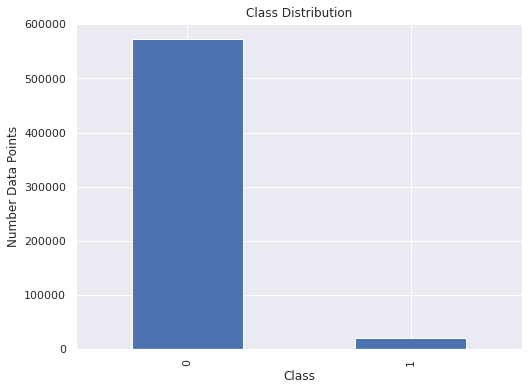

In [84]:
# The target distribution is very imbalanced; Less than 4% records are labeled as 1 in the training dataset
# We may need to solve the problem of imbalanced data in the following parts

sns.set(rc={'figure.figsize':(8,6)})

train_df.target.value_counts().plot(kind = 'bar')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number Data Points')

# Exploratory Data Analysis

In this section, we explore the different types of variables within our dataset (categorical variables and continuous variables) as well as their relationships/correlations. We also get an understanding of the missing values and class labels.

First, we explore the distribution of the categorical variables and the continuous variables by graphing their distributions.

<ipython-input-85-137d626bea41>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))


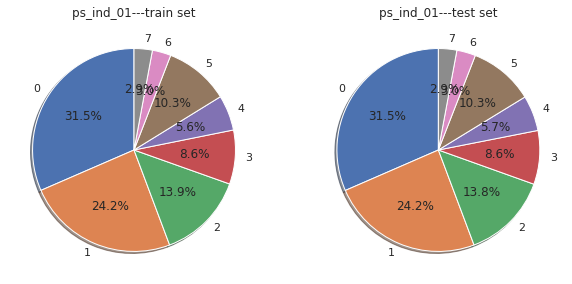

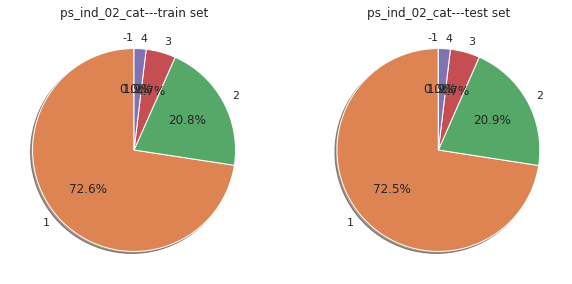

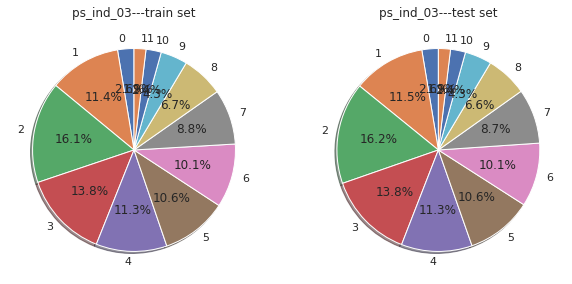

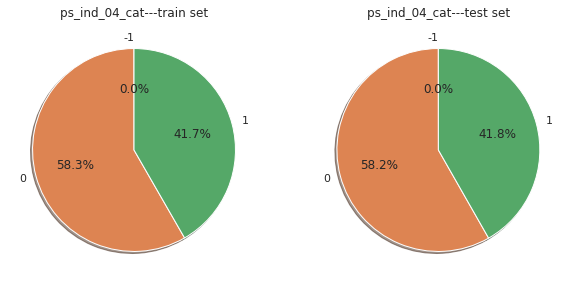

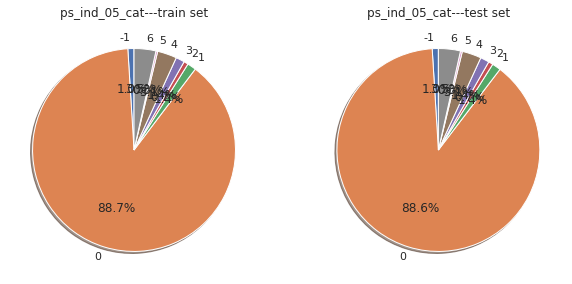

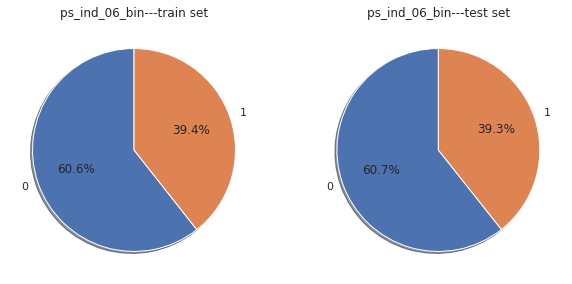

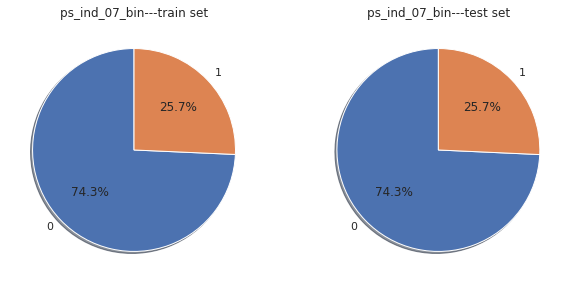

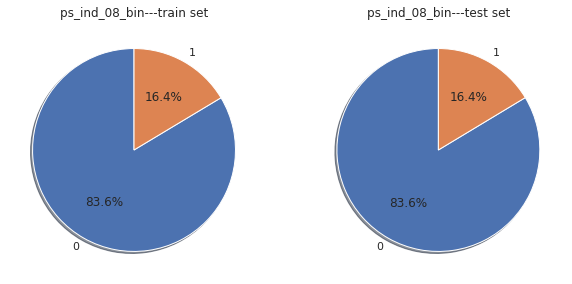

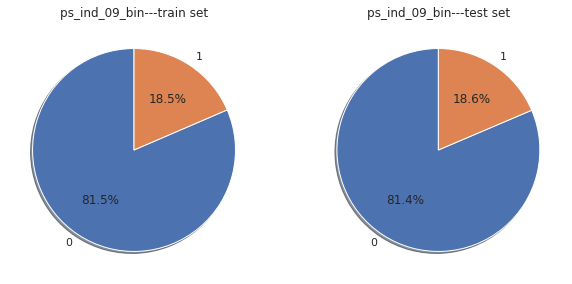

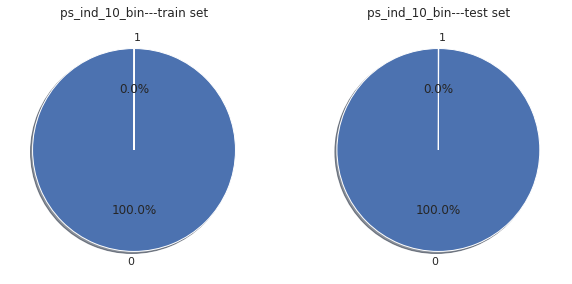

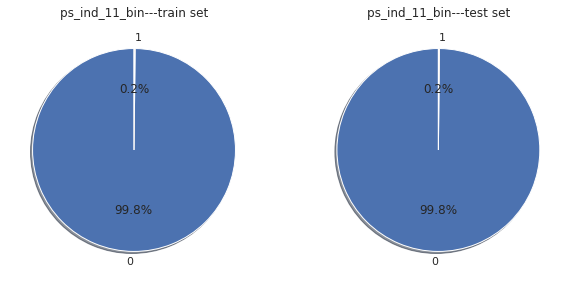

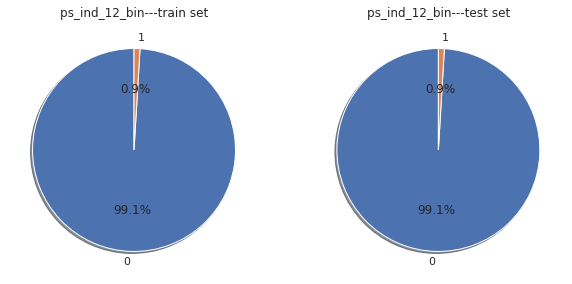

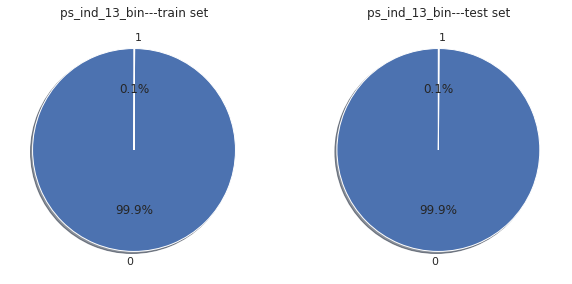

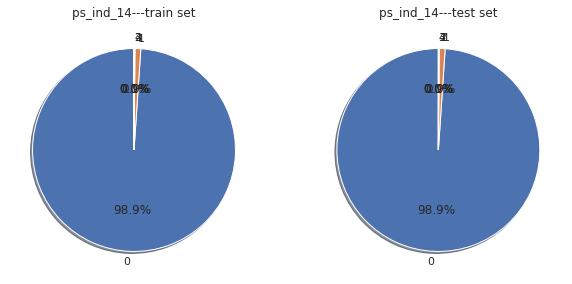

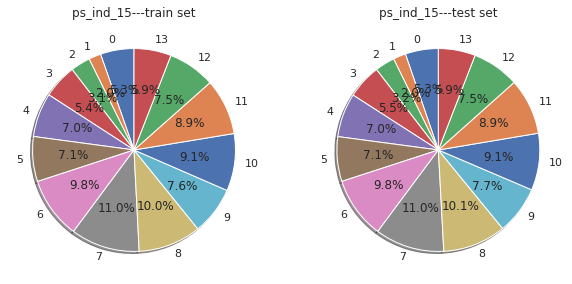

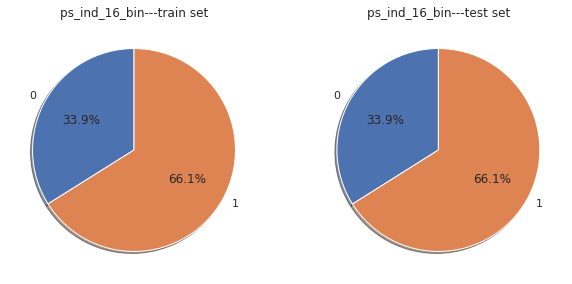

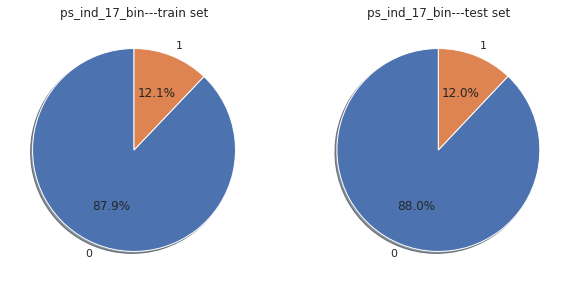

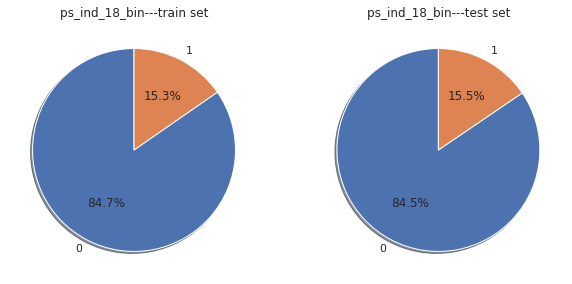

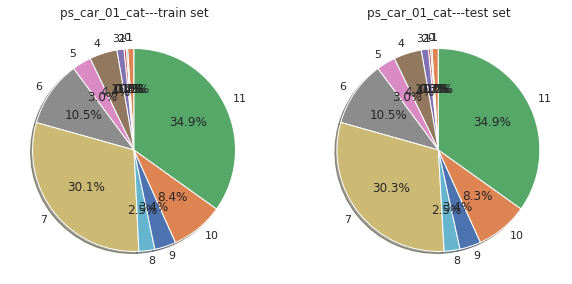

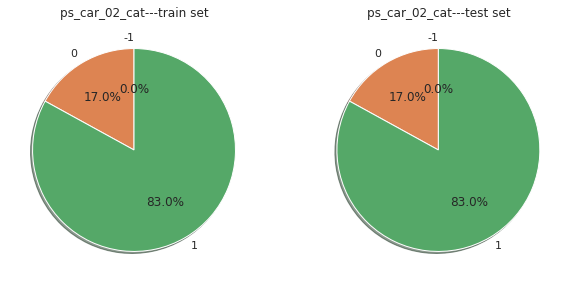

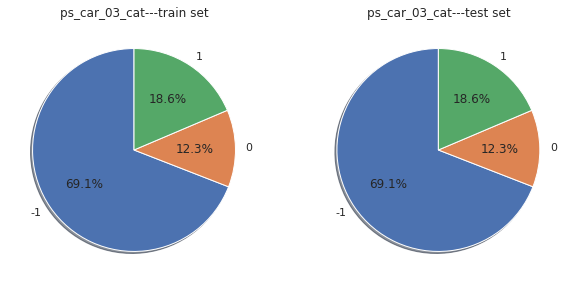

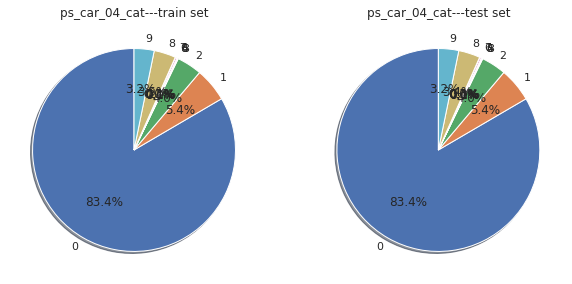

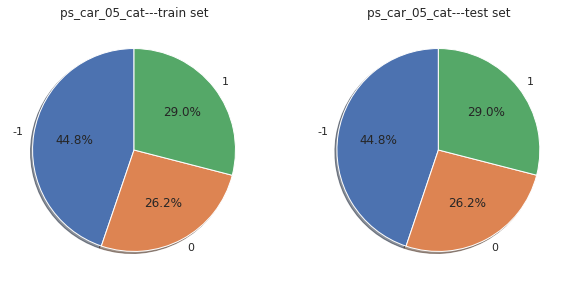

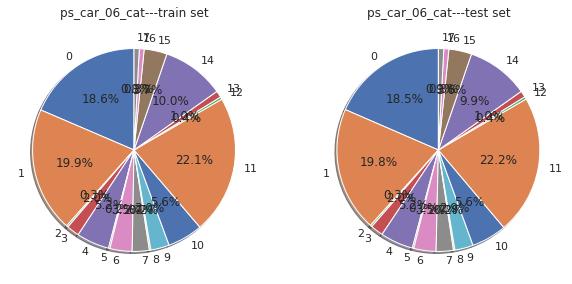

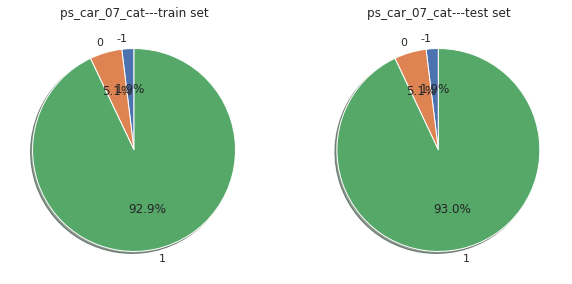

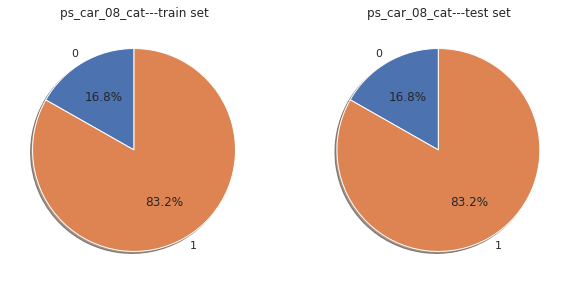

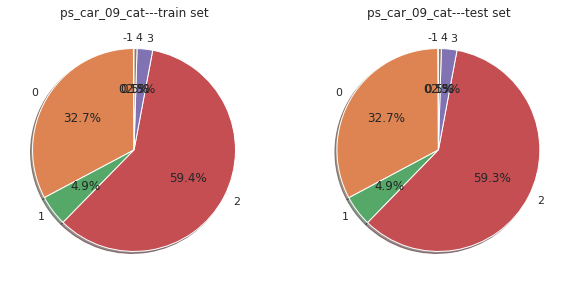

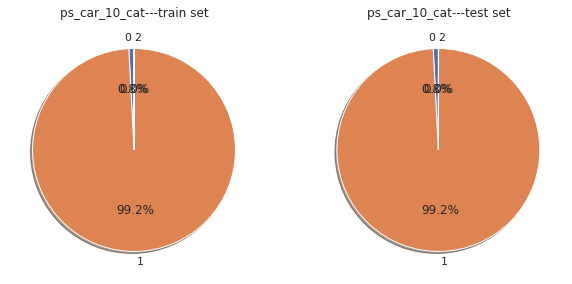

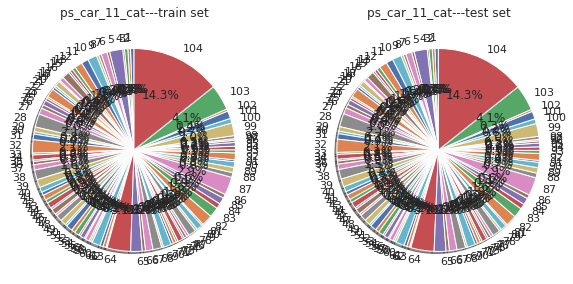

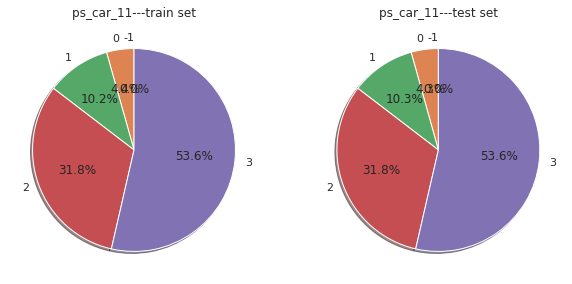

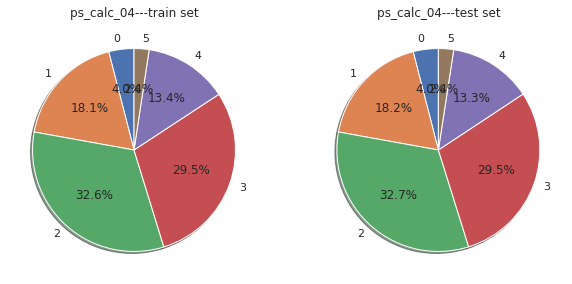

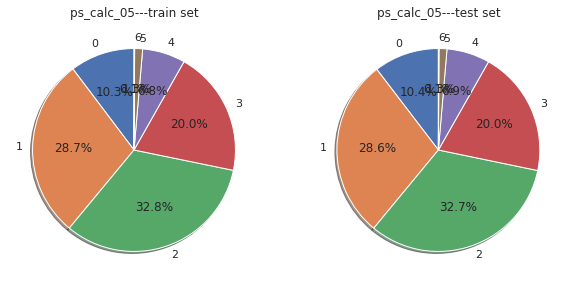

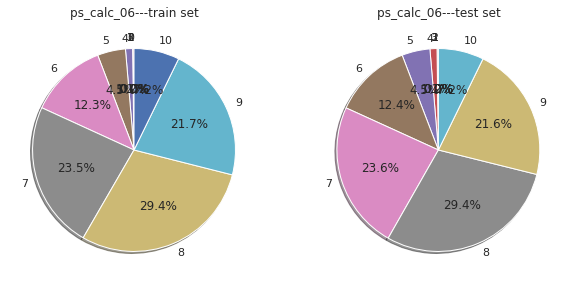

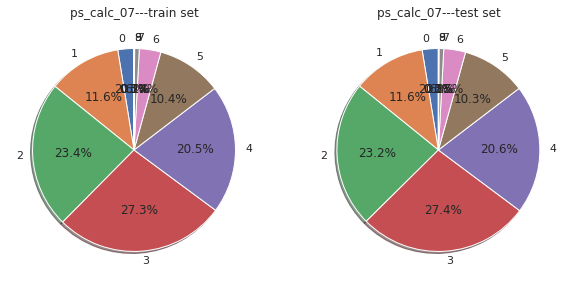

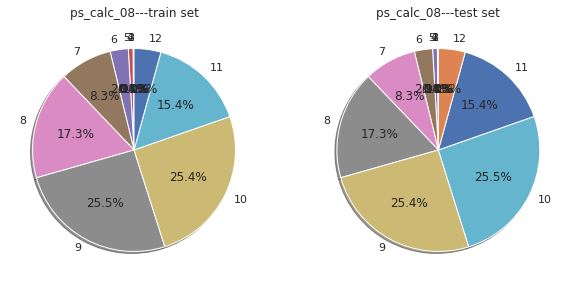

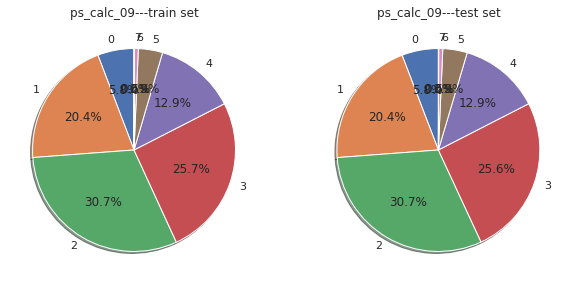

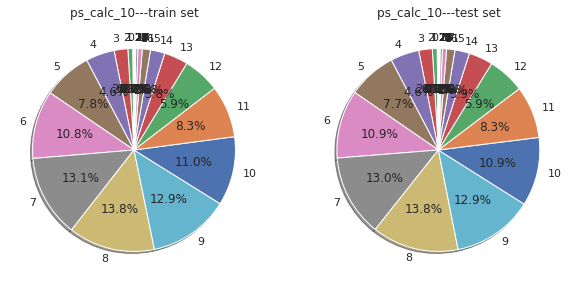

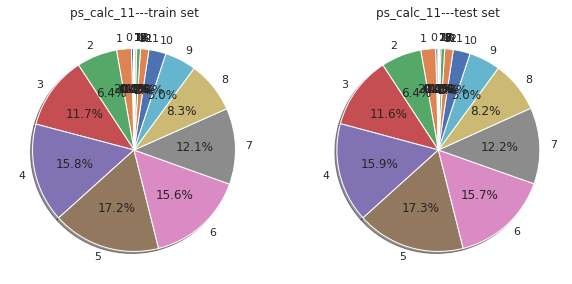

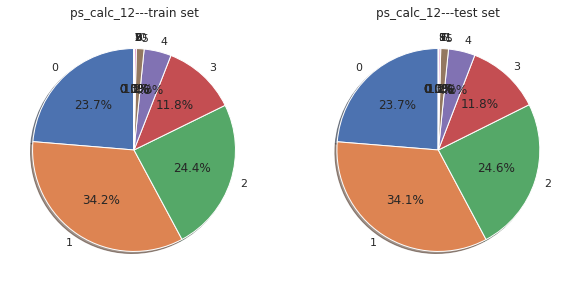

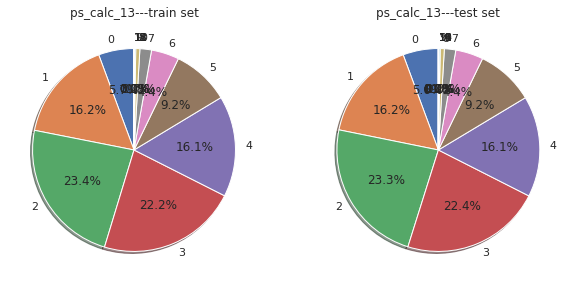

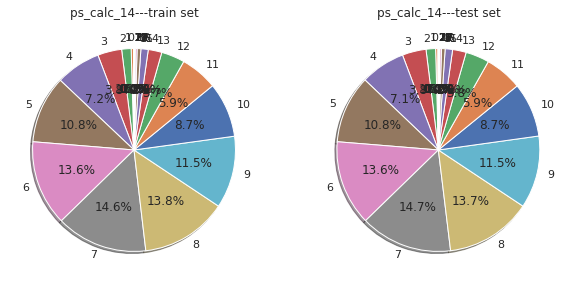

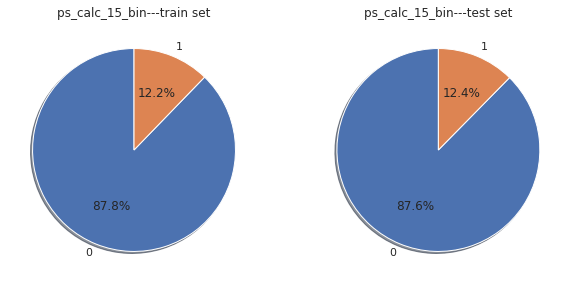

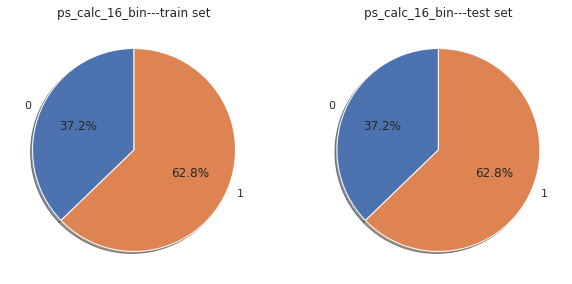

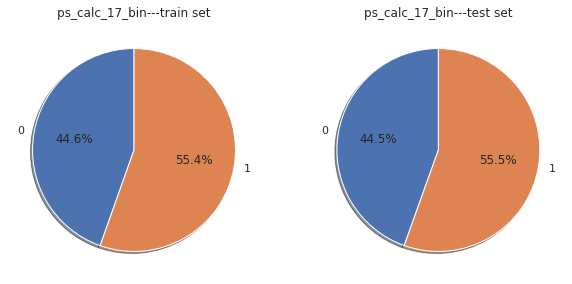

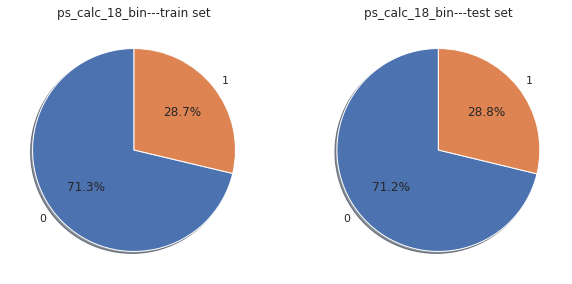

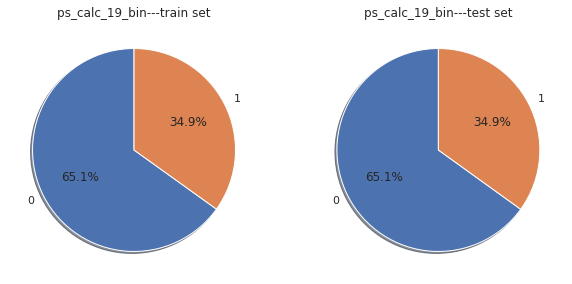

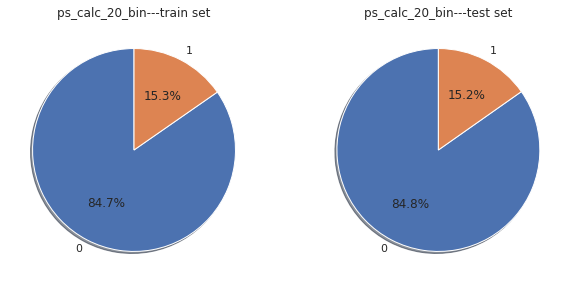

In [85]:
# Draw graphs to check the distribution of the categorical variables between train dataset and test dataset

cat_list=[i for i in train_df.columns[2:] if i not in feat_num]

for i in cat_list:
    df1=train_df.groupby(i)['id'].size().reset_index()
    df2= test_df.groupby(i)['id'].size().reset_index()
    fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
    ax1.pie(df1['id'], labels=df1[i], autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.pie(df2['id'], labels=df2[i], autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.set_title(i+'---train set')
    ax2.set_title(i+'---test set')

# It can be seen that all the categorical variables basically have similar data distributions in the training set and the testing set
# However, we need to pay close attention that the data distribution of columns distributions ps_ind_10_bin\ps_ind_11_bin\ps_ind_12_bin\ps_ind_13_bin\ps_ind_14\ps_car_10_cat are not even

The following graphs are important to note because they show the significant imbalance in their distribution: ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_car_10_cat.



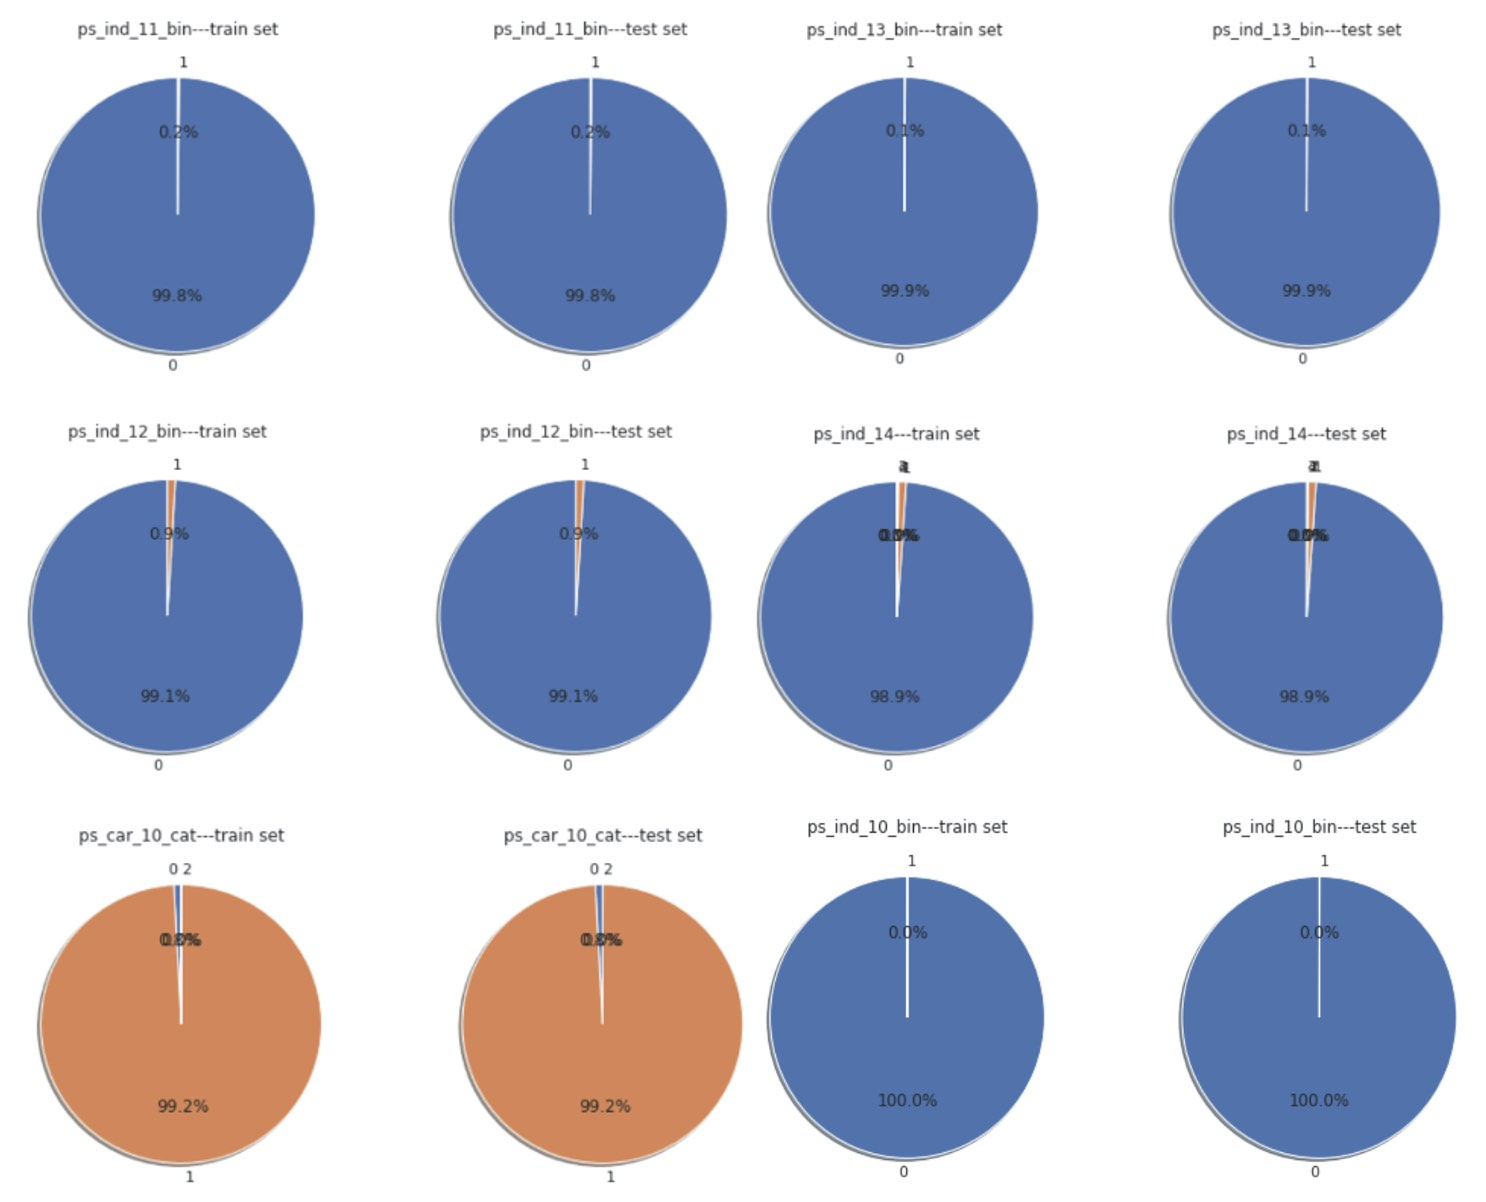

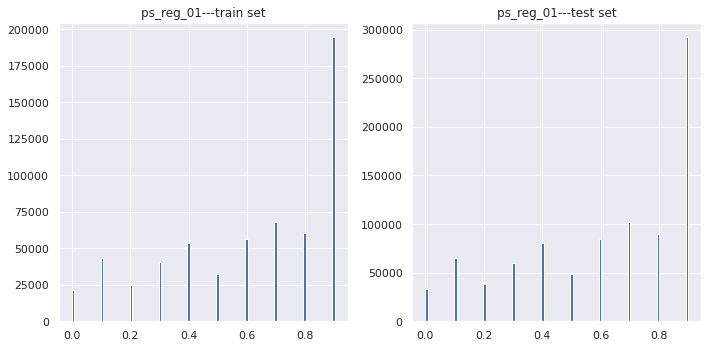

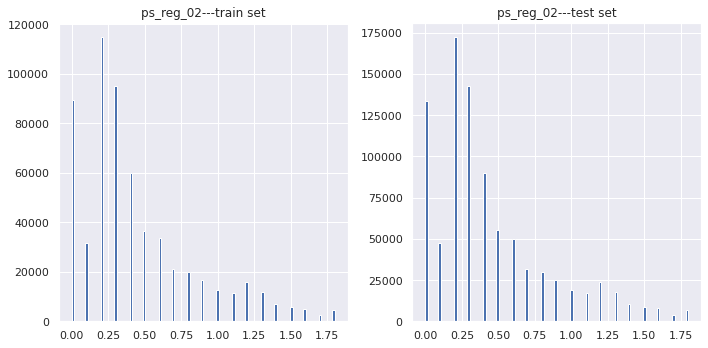

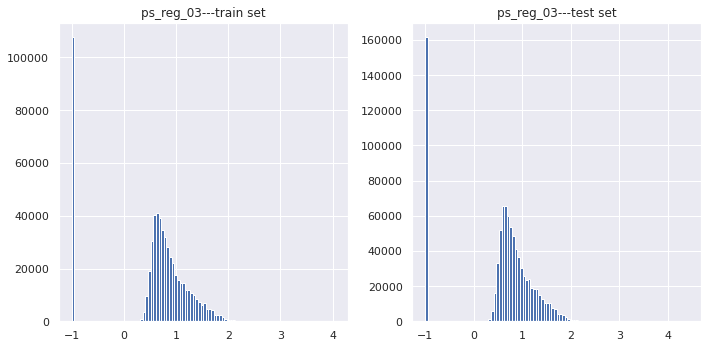

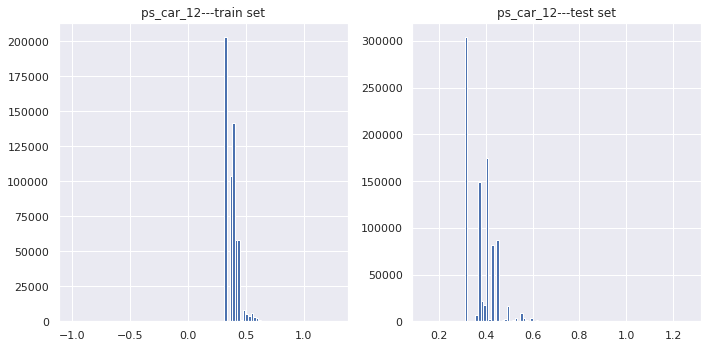

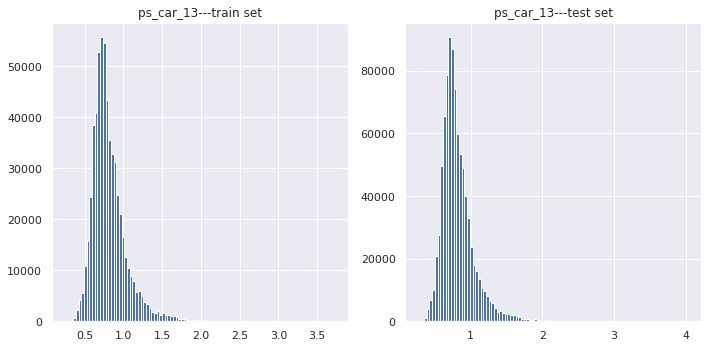

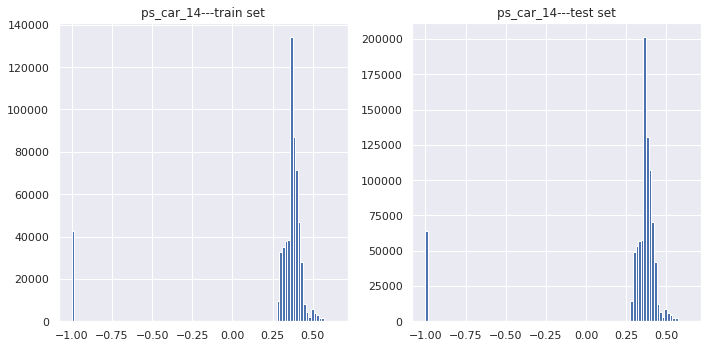

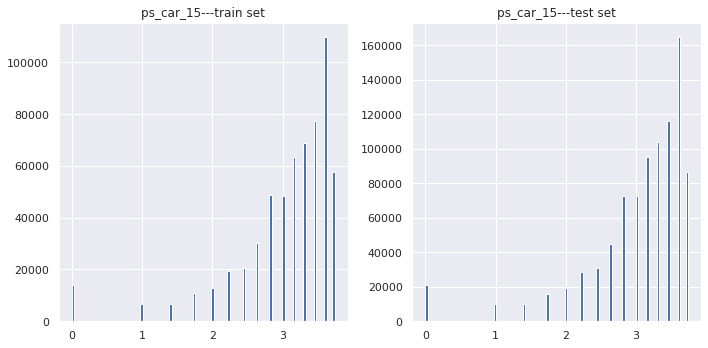

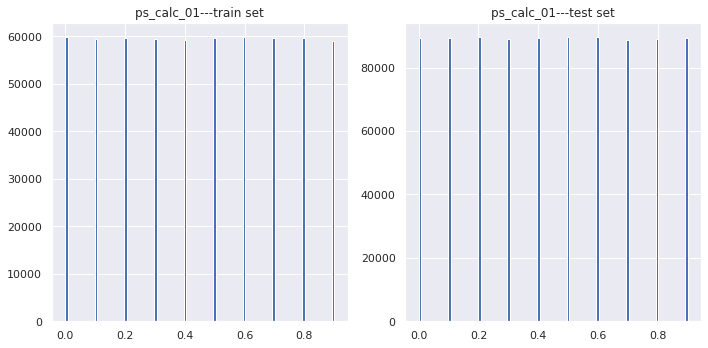

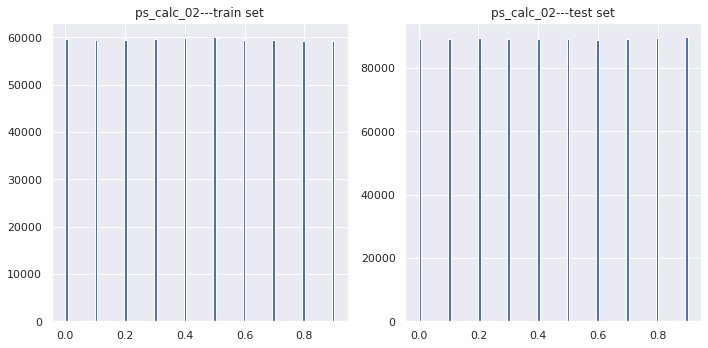

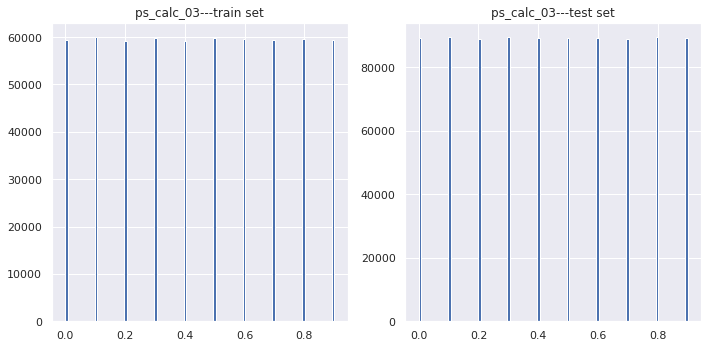

In [86]:
# We check the data distribution of continous variables
# As we can see, the data distribution of continous variables is not large difference between train dataset and the test dataset

for i in list(train_df.columns):
    if isinstance(train_df[i][0],float):
        fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True,figsize=(10,5))
        axs[0].hist(train_df[i], bins=100)
        axs[1].hist(test_df[i], bins=100)
        axs[0].set_title(i+'---train set')
        axs[1].set_title(i+'---test set')

From the charts above, we observe that there is not a significant difference between the data distribution for continuous variables in the training and test datasets.

Then we explore the relationship between missing values in the dataset and the class and target. We can tell from the correlation heat map that the target against all other columns can reach up to a value of 0.2. 

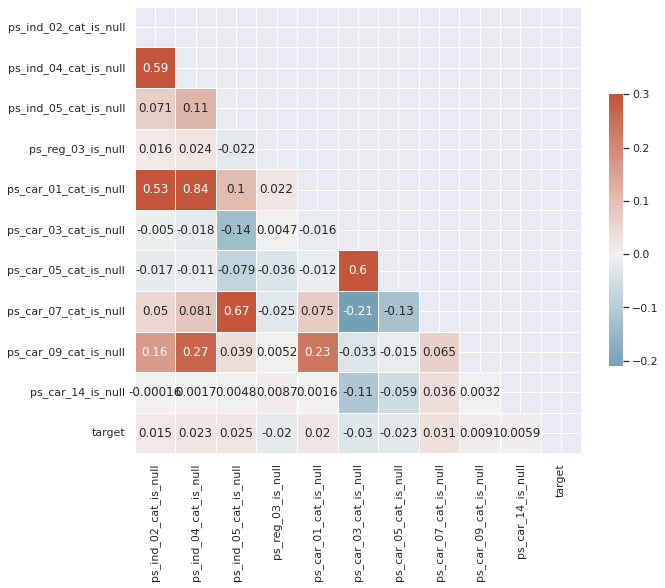

In [87]:
# We check the relationship between missing values and the target
# The results show that the correlation between missing values in part of columns and the target can reach up to 0.02
# Therefore the missing value are significant and filling in the missing values will have a large influence on our results.

null_features = ["{}_is_null".format(x) for x in na_list]
total_rows = float(train_df.shape[0])
train_df_1 = train_df.copy()

for na_list, null_feature in zip(na_list, null_features):
    train_df_1[null_feature] = (train_df_1[na_list]==-1).astype(int)

correlation_features = null_features.copy()
correlation_features.append("target")

null_correlation = train_df_1[correlation_features].corr()
null_correlation.style.background_gradient(cmap='coolwarm')

# plotting the correlation heatmap

f, ax = plt.subplots(figsize=(10, 10))

_ = sns.heatmap(
    null_correlation,
    mask=np.triu(np.ones_like(null_correlation, dtype=bool)),
    cmap=sns.diverging_palette(230, 20, as_cmap=True),
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,annot=True,
    cbar_kws={"shrink": .5}
)

plt.show()

Below we created a bar graph of the number of null values present in each label class. We can tell from the graph that there are significantly more null values for class 0. Meanwhile class 1 has significantly less null values.

Text(0, 0.5, 'Number of Rows')

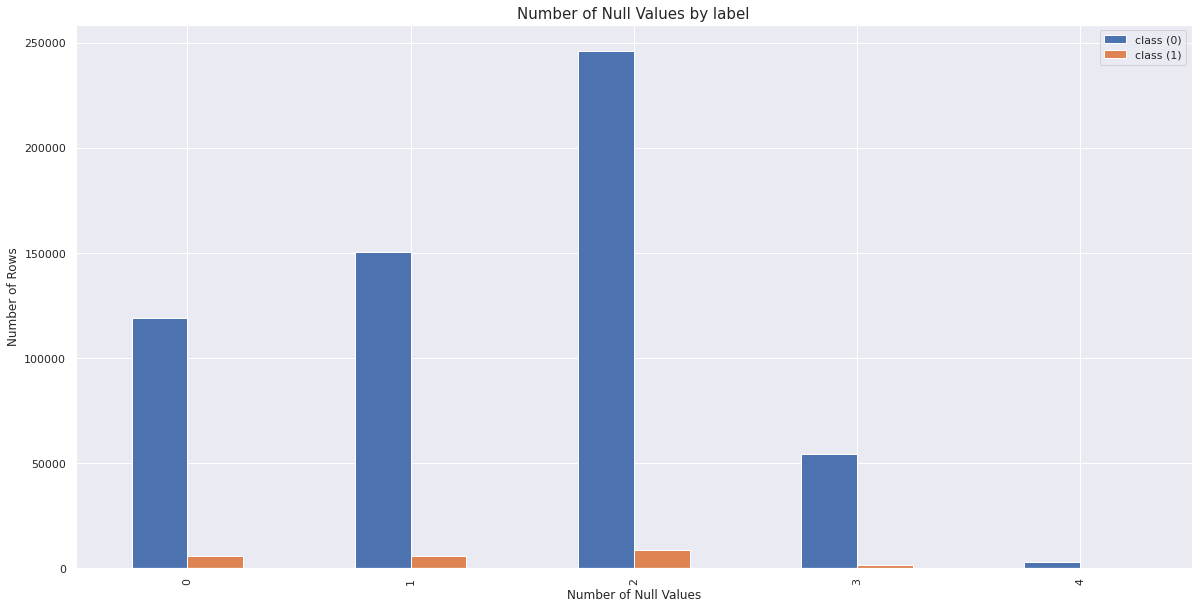

In [88]:
# Check the relationship between the number of missing values and the class label(0 or 1) by the histogram
# We can tell from the graph that there are significantly more null values for class 0. Meanwhile class 1 has significantly less null values.
# The number of missing values have a direct influence on the target. Therefore, it is extra important that we fill in the missing values.

train_df_1["null_count"] = (train_df_1==-1).sum(axis=1)

z = dict()
for (null_count, label), value_count in train_df_1[["null_count", "target"]].value_counts().to_dict().items():
    if null_count not in z:
        z[null_count] = dict()
    z[null_count][label] = value_count

a = []
for null_values in range(5):
    a.append([null_values, z[null_values][0], z[null_values][1]])

df = pd.DataFrame(a, columns=["Number of Null Values", "class (0)", "class (1)"])
ax = df.plot(x="Number of Null Values", y=["class (0)", "class (1)"], kind="bar", figsize=(20, 10))
ax.set_title ("Number of Null Values by label", fontsize=15)
ax.set_ylabel("Number of Rows")

Finally, we explore the relationship and correlation between all variables. From the matrix below, we can tell that there are a wide range of correlations and that we must be cautious in choosing the features that we analyze or combine. We notice that some of the continuous variabes have a higher correlation than other variables, such as ps_reg_03 and ps_reg_02, up to 0.7. Most features however, do not have significant correlations.

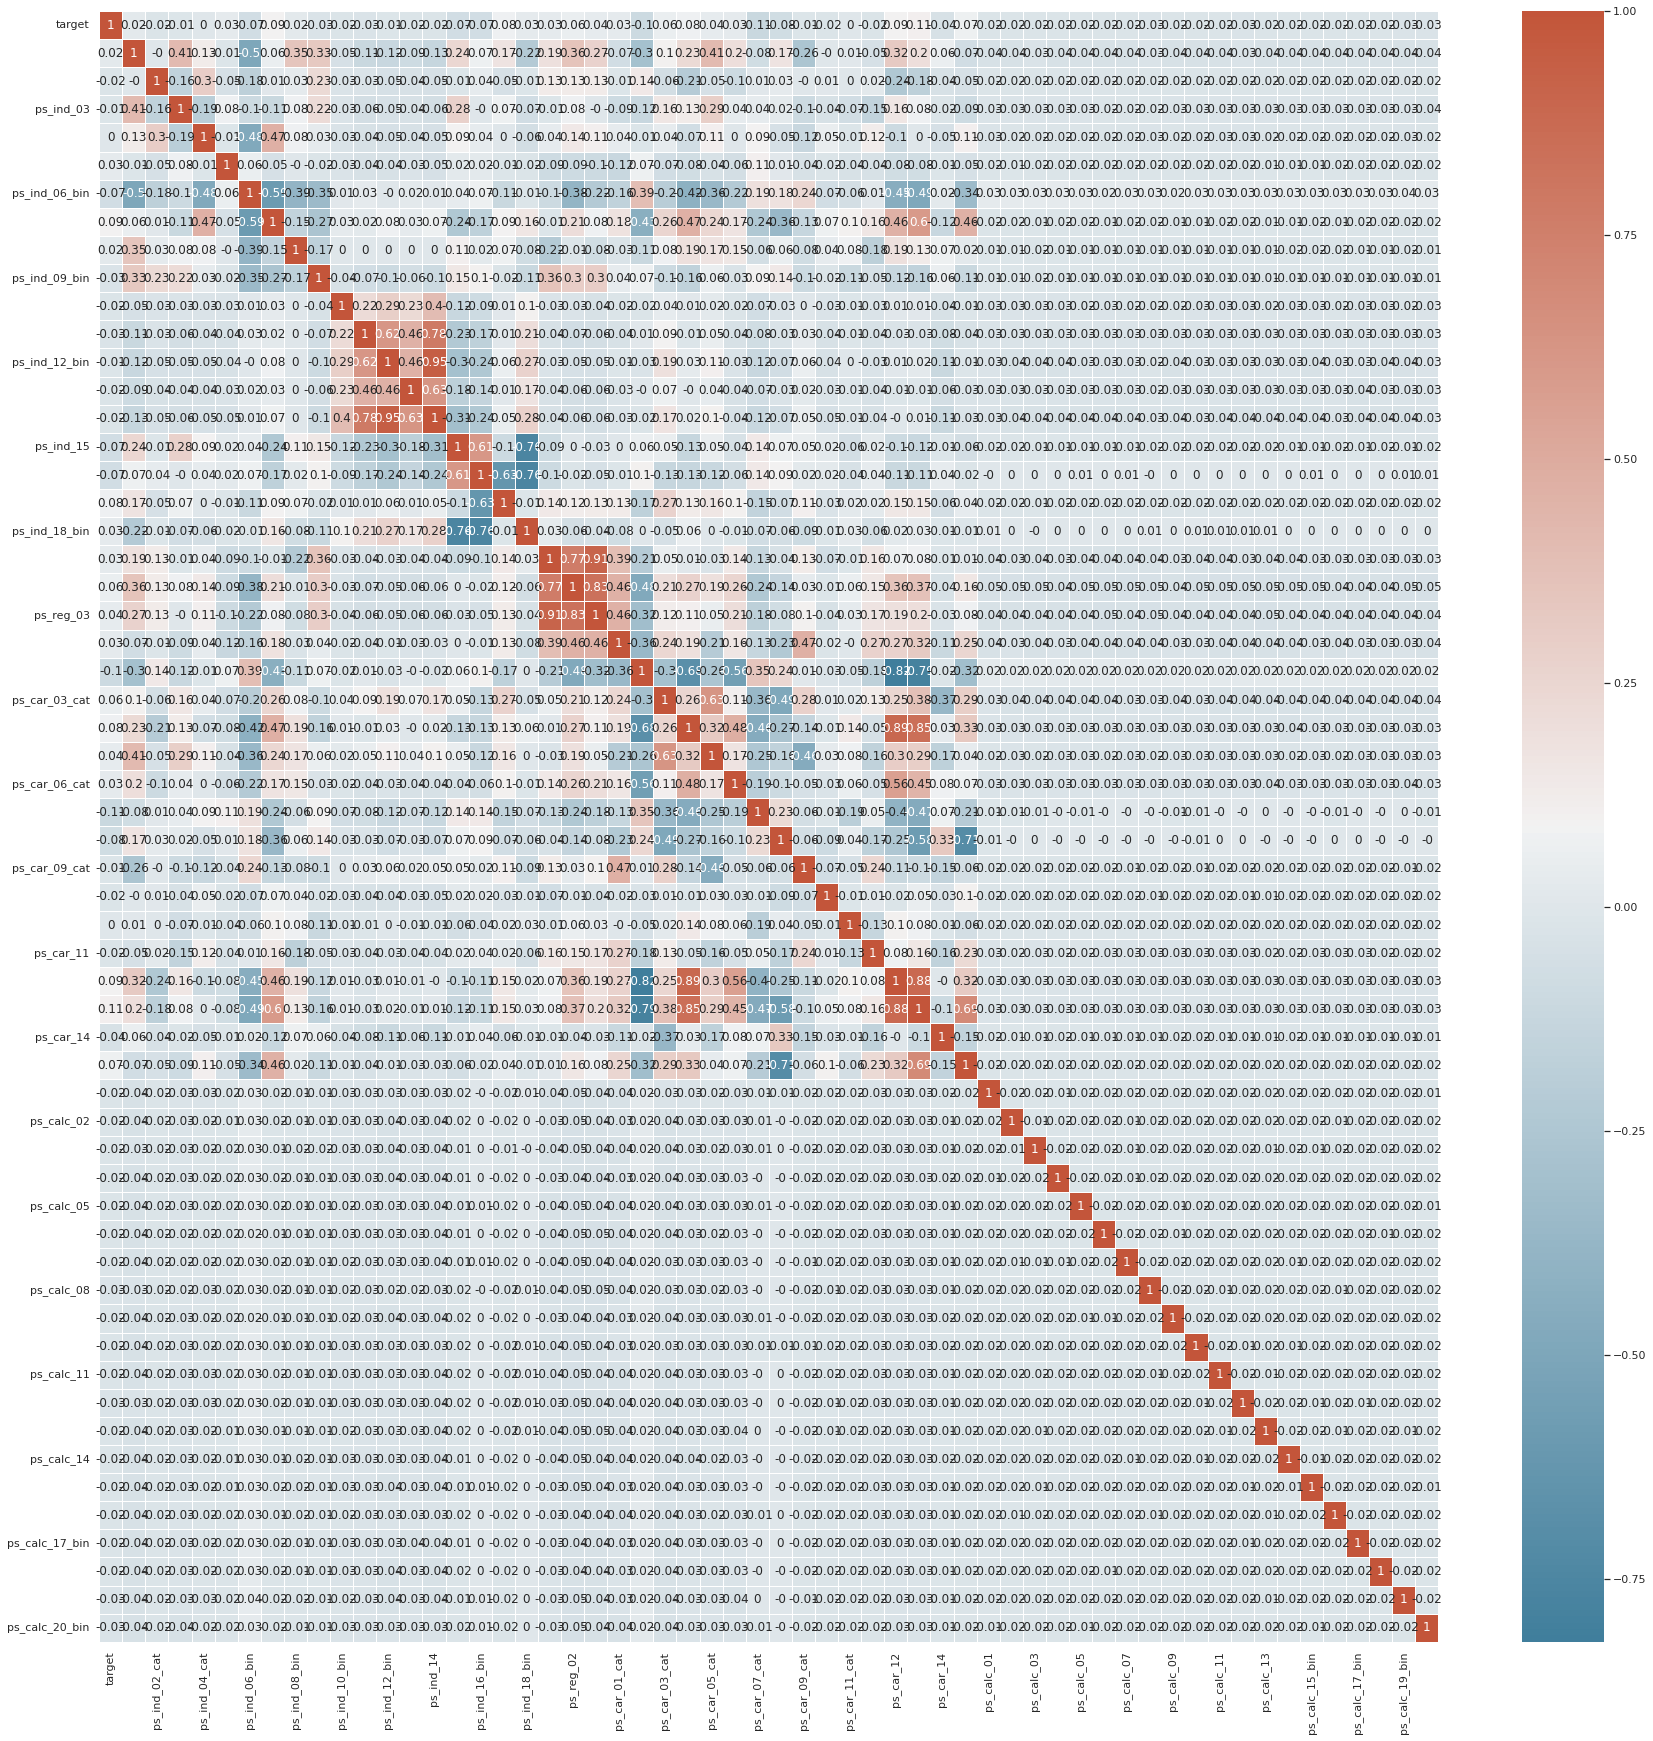

In [89]:
# We check the relationshp among all the variables by the heatmap

corr_mat = train_df.iloc[:,1:].corr()
g=sns.heatmap(round(corr_mat.corr(),2),cmap=sns.diverging_palette(230, 20, as_cmap=True), annot=True, linewidths=.5,fmt='.2g')

g.figure.set_size_inches(30, 30)

In [90]:
# We get all the variables whose absolute correlation value with the target is larger or equal to 0.2 

corr_mat.sort_values('target')['target']
corr_mat.sort_values('target')[abs(corr_mat['target'])>=0.02]['target'][:-2]

<ipython-input-90-1d2444463415>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  corr_mat.sort_values('target')[abs(corr_mat['target'])>=0.02]['target'][:-2]


ps_car_07_cat   -0.036395
ps_ind_06_bin   -0.034017
ps_car_02_cat   -0.031534
ps_ind_16_bin   -0.027778
ps_ind_15       -0.021506
ps_car_08_cat   -0.020342
ps_car_05_cat    0.020754
ps_reg_01        0.022888
ps_car_15        0.027667
ps_ind_05_cat    0.029165
ps_reg_03        0.030888
ps_car_03_cat    0.032401
ps_car_04_cat    0.032900
ps_ind_07_bin    0.034218
ps_reg_02        0.034800
ps_ind_17_bin    0.037053
ps_car_12        0.038790
Name: target, dtype: float64

# Feature Engineering

In this section, we manipulate the dataset in order to improve our models' accuracy and precision. 

First, we balance the target class distribution since we explored that there is a large imbalance within our target class distribution.

Text(0.5, 1.0, 'Target Distribution')

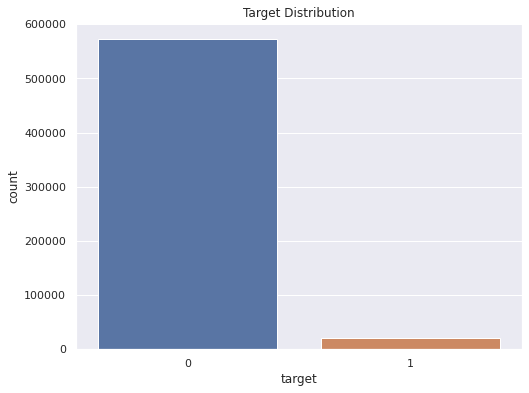

In [91]:
# As talked about above, the target's class distribution is very imbalanced.
# Less than 4% records are labeled as 1 in the trainning dataset.
# In this part, we use undersampling to balance the target class distribution.

sns.set(rc={'figure.figsize':(8,6)})

sns.countplot(x = train_df.target)

train_df.target.value_counts()/train_df.shape[0]
plt.title('Target Distribution')

In [92]:
# We construct a function to conduct undersampling.

def undersampling(df, partion_raito = 0.2):
    # obtain the index of target = 0 and target = 1
    index_class_0 = df[df.target == 0].index
    index_class_1 = df[df.target == 1].index
    
    # gain the number of target = 0 and target = 1
    number_class_0 = len(index_class_0)
    number_class_1 = len(index_class_1)
    
    # we will calculate the undersampling rate according to the above inforamtion
    undersampling_rate = ((1-partion_raito)*number_class_1)/(number_class_0*partion_raito)
    undersampling_size = int(undersampling_rate*number_class_0)

    from sklearn.utils import shuffle
    # we use shuffle function to randomly sample all the data with target = 0. With seed = 10, the number of samples is the value just calculated. 
    undersampling_index = shuffle(index_class_0, random_state=10, n_samples=undersampling_size)
    
    # Add the undersampling index with target = 1 index together
    index_total = list(undersampling_index)+list(index_class_1)
    
    # Search the data according to the index in the train dataset
    df = df.loc[index_total].reset_index(drop=True)    
    return df

Text(0.5, 1.0, 'Target Distribution Resample')

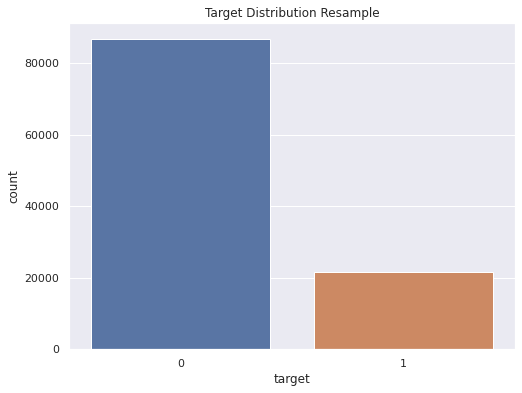

In [93]:
# We resample the target dataset and draw the graph after undersampling.
# The graph shows that the target dataset more balanced with a ratio of 0.8 : 0.2.

train_df = undersampling(df = train_df)

sns.set(rc={'figure.figsize':(8,6)})

sns.countplot(x = train_df.target)
    
train_df.target.value_counts()/train_df.shape[0]
plt.title('Target Distribution Resample')

In [94]:
# We re-observe the missing percent of data in all the columns in train dataset

na_list=[]
for col in train_df.columns:
    missing = sum(train_df[col] == -1)
    if round(missing*100/len(train_df),2)> 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(train_df),2)}%)')

ps_ind_02_cat:69(0.06%)
ps_ind_04_cat:41(0.04%)
ps_ind_05_cat:1298(1.2%)
ps_reg_03:18840(17.37%)
ps_car_01_cat:46(0.04%)
ps_car_03_cat:73419(67.69%)
ps_car_05_cat:47347(43.65%)
ps_car_07_cat:2531(2.33%)
ps_car_09_cat:131(0.12%)
ps_car_14:7900(7.28%)


In [95]:
# We re-observe the missing percent of data in all the columns in test dataset

na_list=[]
for col in test_df.columns:
    missing = sum(test_df[col] == -1)
    if round(missing*100/len(train_df),2)> 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(test_df),2)}%)')

ps_ind_02_cat:307(0.03%)
ps_ind_04_cat:145(0.02%)
ps_ind_05_cat:8710(0.98%)
ps_reg_03:161684(18.11%)
ps_car_01_cat:160(0.02%)
ps_car_03_cat:616911(69.1%)
ps_car_05_cat:400359(44.84%)
ps_car_07_cat:17331(1.94%)
ps_car_09_cat:877(0.1%)
ps_car_14:63805(7.15%)


In [96]:
# Drop the ps_car_03_cat:616911(69.1%), ps_car_05_cat:400359(44.84%) columns because the missing percent of these two columns are too large

train_df = train_df.drop(['ps_car_03_cat','ps_car_05_cat'], axis=1)
test_df  = test_df.drop (['ps_car_03_cat','ps_car_05_cat'], axis=1)

After balancing the target class dristribution and dropping columns with too many missing values that could potentially decrease the accuracy of our models, we fill in the missing values of the other columns using etiher the mean or the mode depending on the distribution of the column/feature. We are filling in the missing values because our analysis above showed us that missing values have a direct influence on our target.

In [97]:
# We use the Simple Imputer to fill the missing value
# One strategy uses the variable mean to impute missing values. Another strategy uses the variable mode to impute missing values

from sklearn.impute import SimpleImputer

mean_filling = SimpleImputer(strategy='mean', missing_values = -1, add_indicator=True)
mode_filling = SimpleImputer(strategy='most_frequent', missing_values = -1,  add_indicator=True)

We decided to analyze ps_reg_03 because it has a relatively low number of missing values (18.11%) for a continuous variable and from the visualization that we gather below, most of the data is centralized around the value 1. From this analysis, we are able to strategically choose to use the mode to fill in the missing values in the column.

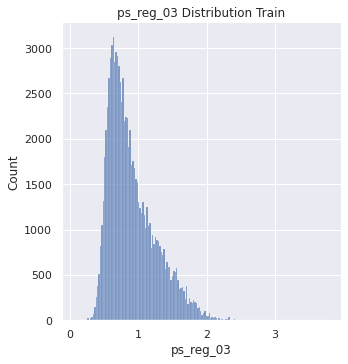

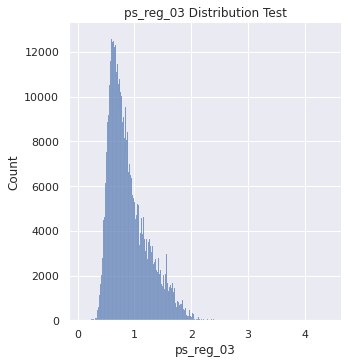

In [98]:
# We show a graph visualization of ps_reg_03:161684(18.11%)

sns.set(style = 'white')

sns.set(rc={'figure.figsize':(8,6)})

sns.displot(train_df.ps_reg_03.replace(-1,np.nan)).set(title = 'ps_reg_03 Distribution Train')

sns.displot(test_df.ps_reg_03.replace(-1,np.nan)).set(title = 'ps_reg_03 Distribution Test')

plt.show()

In [99]:
# We fill in the column ps_reg_03 by using variable mean strategy.

train_df['ps_reg_03'] = [x[0] for x in mean_filling.fit_transform(train_df[['ps_reg_03']]).tolist()]
test_df['ps_reg_03']  = [x[0] for x in mean_filling.fit_transform(test_df[['ps_reg_03']]).tolist()]

We decided to ps_car_14 because it also has a relatively low amount of missing values (7.16%) for a continuous variable and from the visualization that we gather below, the data shows a relatively normalized distribution. From this analysis, we were able to strategically choose to use the mean to fill in the missing values in the column.

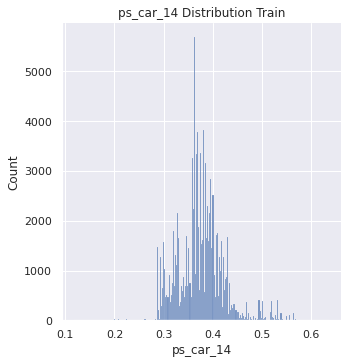

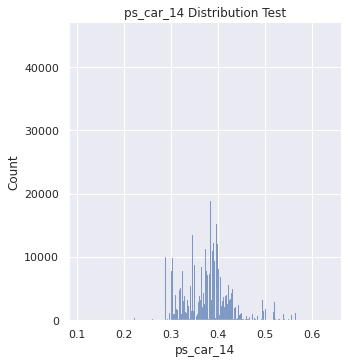

In [100]:
# We show graph visualization of ps_car_14:63805(7.15%)

sns.set(style = 'white')

sns.set(rc={'figure.figsize':(8,6)})

sns.displot(train_df.ps_car_14.replace(-1,np.nan)).set(title = 'ps_car_14 Distribution Train')

sns.displot(test_df.ps_car_14.replace(-1,np.nan)).set(title = 'ps_car_14 Distribution Test')


plt.show()


In [101]:
# We fill in the column ps_car_14 using mode to impute missing values by using variable mean strategy.

train_df['ps_car_14']= [x[0] for x in mean_filling.fit_transform(train_df[['ps_car_14']]).tolist()]
test_df['ps_car_14'] = [x[0] for x in mean_filling.fit_transform(test_df[['ps_car_14']]).tolist()]

After filling in the missing values for our continuous variables, we fill in the missing values of our categorial variables. These include: ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat',' ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_07_cat', 'ps_car_09_cat'

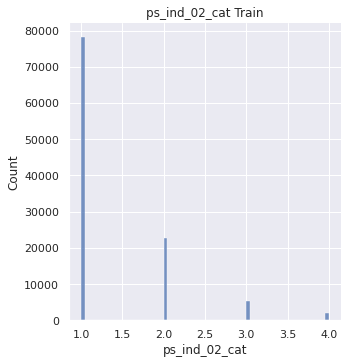

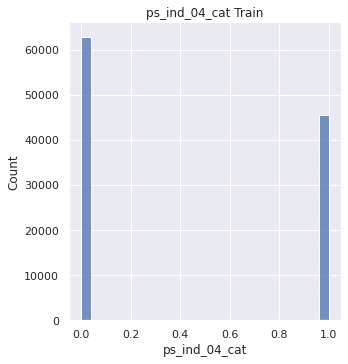

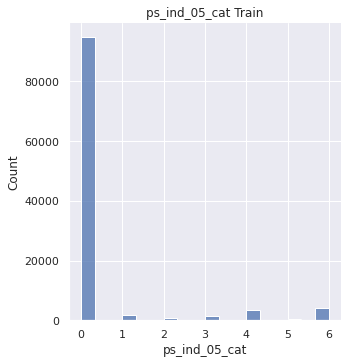

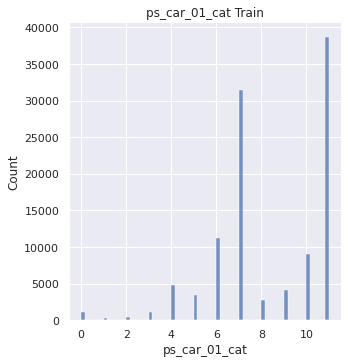

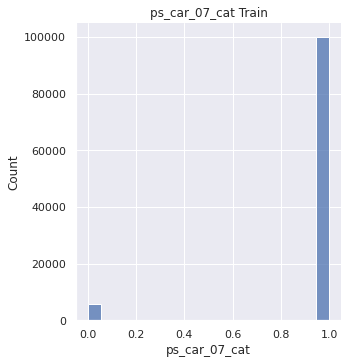

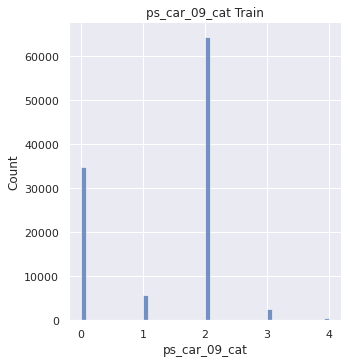

In [102]:
# We show graph visualization of'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat'

sns.displot(train_df.ps_ind_02_cat.replace(-1,np.nan)).set(title = 'ps_ind_02_cat Train')

sns.displot(train_df.ps_ind_04_cat.replace(-1,np.nan)).set(title = 'ps_ind_04_cat Train')

sns.displot(train_df.ps_ind_05_cat.replace(-1,np.nan)).set(title = 'ps_ind_05_cat Train')

sns.displot(train_df.ps_car_01_cat.replace(-1,np.nan)).set(title = 'ps_car_01_cat Train')

sns.displot(train_df.ps_car_07_cat.replace(-1,np.nan)).set(title = 'ps_car_07_cat Train')

sns.displot(train_df.ps_car_09_cat.replace(-1,np.nan)).set(title = 'ps_car_09_cat Train')

In [103]:
# By using mode strategy to impute missing values, We fill in the column 'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat'
# We use the mode strategy because these values are all categorical variables and some of the values are significantly more frequant and dominate over others.

missing_value_columns_less_two_percent_train = train_df[['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat']]
missing_value_columns_less_two_percent_train_list = missing_value_columns_less_two_percent_train.columns

imp_1 = mode_filling.fit_transform(train_df[missing_value_columns_less_two_percent_train_list])
train_df[missing_value_columns_less_two_percent_train_list] = pd.DataFrame(imp_1).iloc[:,:len(missing_value_columns_less_two_percent_train_list)]

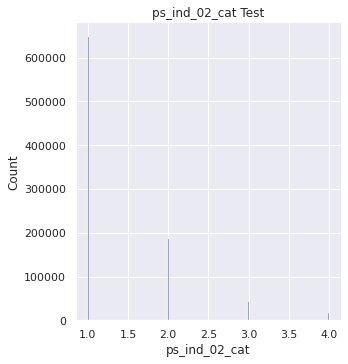

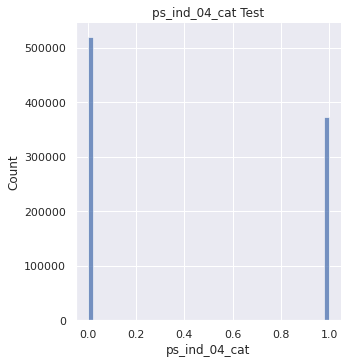

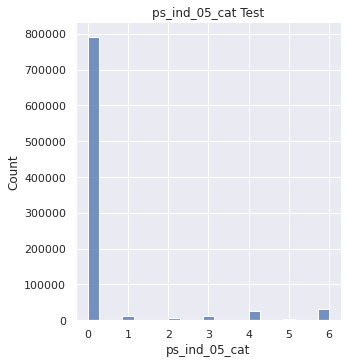

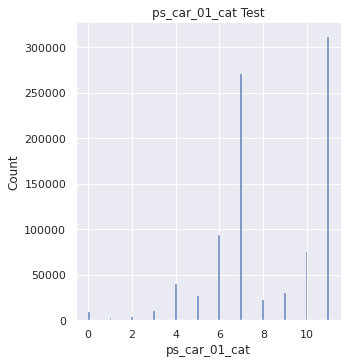

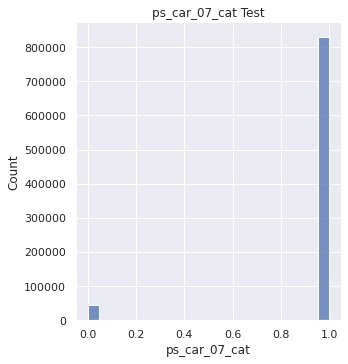

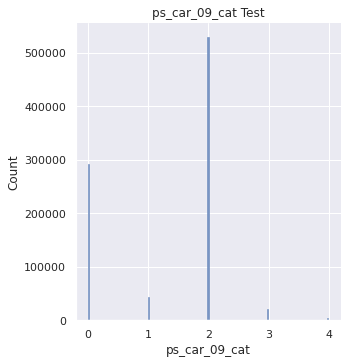

In [104]:
#  We show graph visualization of'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat'

sns.displot(test_df.ps_ind_02_cat.replace(-1,np.nan)).set(title = 'ps_ind_02_cat Test')

sns.displot(test_df.ps_ind_04_cat.replace(-1,np.nan)).set(title = 'ps_ind_04_cat Test')

sns.displot(test_df.ps_ind_05_cat.replace(-1,np.nan)).set(title = 'ps_ind_05_cat Test')

sns.displot(test_df.ps_car_01_cat.replace(-1,np.nan)).set(title = 'ps_car_01_cat Test')

sns.displot(test_df.ps_car_07_cat.replace(-1,np.nan)).set(title = 'ps_car_07_cat Test')

sns.displot(test_df.ps_car_09_cat.replace(-1,np.nan)).set(title = 'ps_car_09_cat Test')

In [105]:
# By using mode strategy to impute missing values, We fill in the column 'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat'
# We use the mode strategy because these values are all categorical variables and some of the values are significantly more frequant and dominate over others.

missing_value_columns_less_two_percent_test  = test_df[['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_car_01_cat','ps_car_07_cat','ps_car_09_cat']]
missing_value_columns_less_two_percent_test_list  = missing_value_columns_less_two_percent_test.columns

imp_2 = mode_filling.fit_transform(test_df[missing_value_columns_less_two_percent_test_list])
test_df[missing_value_columns_less_two_percent_test_list]  = pd.DataFrame(imp_2).iloc[:,:len(missing_value_columns_less_two_percent_test_list)]

We now observe that there are no missing values in our training and test datasets based on the strategies we implemented above. This means that we have a complete dataset using the mode and mean strategy above. 

In [106]:
# Checking if there are missing values in training dataset
# Observation: No missing value in train dataset
na_list=[]
for col in train_df.columns:
    missing = sum(train_df[col] == -1)
    if round(missing*100/len(train_df),2) == 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(train_df),2)}%)')

id:0(0.0%)
target:0(0.0%)
ps_ind_01:0(0.0%)
ps_ind_02_cat:0(0.0%)
ps_ind_03:0(0.0%)
ps_ind_04_cat:0(0.0%)
ps_ind_05_cat:0(0.0%)
ps_ind_06_bin:0(0.0%)
ps_ind_07_bin:0(0.0%)
ps_ind_08_bin:0(0.0%)
ps_ind_09_bin:0(0.0%)
ps_ind_10_bin:0(0.0%)
ps_ind_11_bin:0(0.0%)
ps_ind_12_bin:0(0.0%)
ps_ind_13_bin:0(0.0%)
ps_ind_14:0(0.0%)
ps_ind_15:0(0.0%)
ps_ind_16_bin:0(0.0%)
ps_ind_17_bin:0(0.0%)
ps_ind_18_bin:0(0.0%)
ps_reg_01:0(0.0%)
ps_reg_02:0(0.0%)
ps_reg_03:0(0.0%)
ps_car_01_cat:0(0.0%)
ps_car_02_cat:0(0.0%)
ps_car_04_cat:0(0.0%)
ps_car_06_cat:0(0.0%)
ps_car_07_cat:0(0.0%)
ps_car_08_cat:0(0.0%)
ps_car_09_cat:0(0.0%)
ps_car_10_cat:0(0.0%)
ps_car_11_cat:0(0.0%)
ps_car_11:0(0.0%)
ps_car_12:0(0.0%)
ps_car_13:0(0.0%)
ps_car_14:0(0.0%)
ps_car_15:0(0.0%)
ps_calc_01:0(0.0%)
ps_calc_02:0(0.0%)
ps_calc_03:0(0.0%)
ps_calc_04:0(0.0%)
ps_calc_05:0(0.0%)
ps_calc_06:0(0.0%)
ps_calc_07:0(0.0%)
ps_calc_08:0(0.0%)
ps_calc_09:0(0.0%)
ps_calc_10:0(0.0%)
ps_calc_11:0(0.0%)
ps_calc_12:0(0.0%)
ps_calc_13:0(0.0%)
ps_ca

In [107]:
# Checking if there are missing values in test dataset
# Observation: No missing value in test dataset
na_list=[]
for col in test_df.columns:
    missing = sum(test_df[col] == -1)
    if round(missing*100/len(test_df),2) == 0:
      na_list.append(col)
      print(f'{col}:{missing}({round(missing*100/len(train_df),2)}%)')

id:0(0.0%)
ps_ind_01:0(0.0%)
ps_ind_02_cat:0(0.0%)
ps_ind_03:0(0.0%)
ps_ind_04_cat:0(0.0%)
ps_ind_05_cat:0(0.0%)
ps_ind_06_bin:0(0.0%)
ps_ind_07_bin:0(0.0%)
ps_ind_08_bin:0(0.0%)
ps_ind_09_bin:0(0.0%)
ps_ind_10_bin:0(0.0%)
ps_ind_11_bin:0(0.0%)
ps_ind_12_bin:0(0.0%)
ps_ind_13_bin:0(0.0%)
ps_ind_14:0(0.0%)
ps_ind_15:0(0.0%)
ps_ind_16_bin:0(0.0%)
ps_ind_17_bin:0(0.0%)
ps_ind_18_bin:0(0.0%)
ps_reg_01:0(0.0%)
ps_reg_02:0(0.0%)
ps_reg_03:0(0.0%)
ps_car_01_cat:0(0.0%)
ps_car_02_cat:5(0.0%)
ps_car_04_cat:0(0.0%)
ps_car_06_cat:0(0.0%)
ps_car_07_cat:0(0.0%)
ps_car_08_cat:0(0.0%)
ps_car_09_cat:0(0.0%)
ps_car_10_cat:0(0.0%)
ps_car_11_cat:0(0.0%)
ps_car_11:1(0.0%)
ps_car_12:0(0.0%)
ps_car_13:0(0.0%)
ps_car_14:0(0.0%)
ps_car_15:0(0.0%)
ps_calc_01:0(0.0%)
ps_calc_02:0(0.0%)
ps_calc_03:0(0.0%)
ps_calc_04:0(0.0%)
ps_calc_05:0(0.0%)
ps_calc_06:0(0.0%)
ps_calc_07:0(0.0%)
ps_calc_08:0(0.0%)
ps_calc_09:0(0.0%)
ps_calc_10:0(0.0%)
ps_calc_11:0(0.0%)
ps_calc_12:0(0.0%)
ps_calc_13:0(0.0%)
ps_calc_14:0(0.0%)
p

As talked above, We use pie charts to analyze the value distribution of categorical variables in the training set and test set. We observe that almost all the values in these 6 categorical variables are 0 or 1 and there is significant imbalance in their distribution, which indicates that the variance of these columns is extremely small. Thus, this shows that these 6 variables are meaningless in the train and test datasets. 

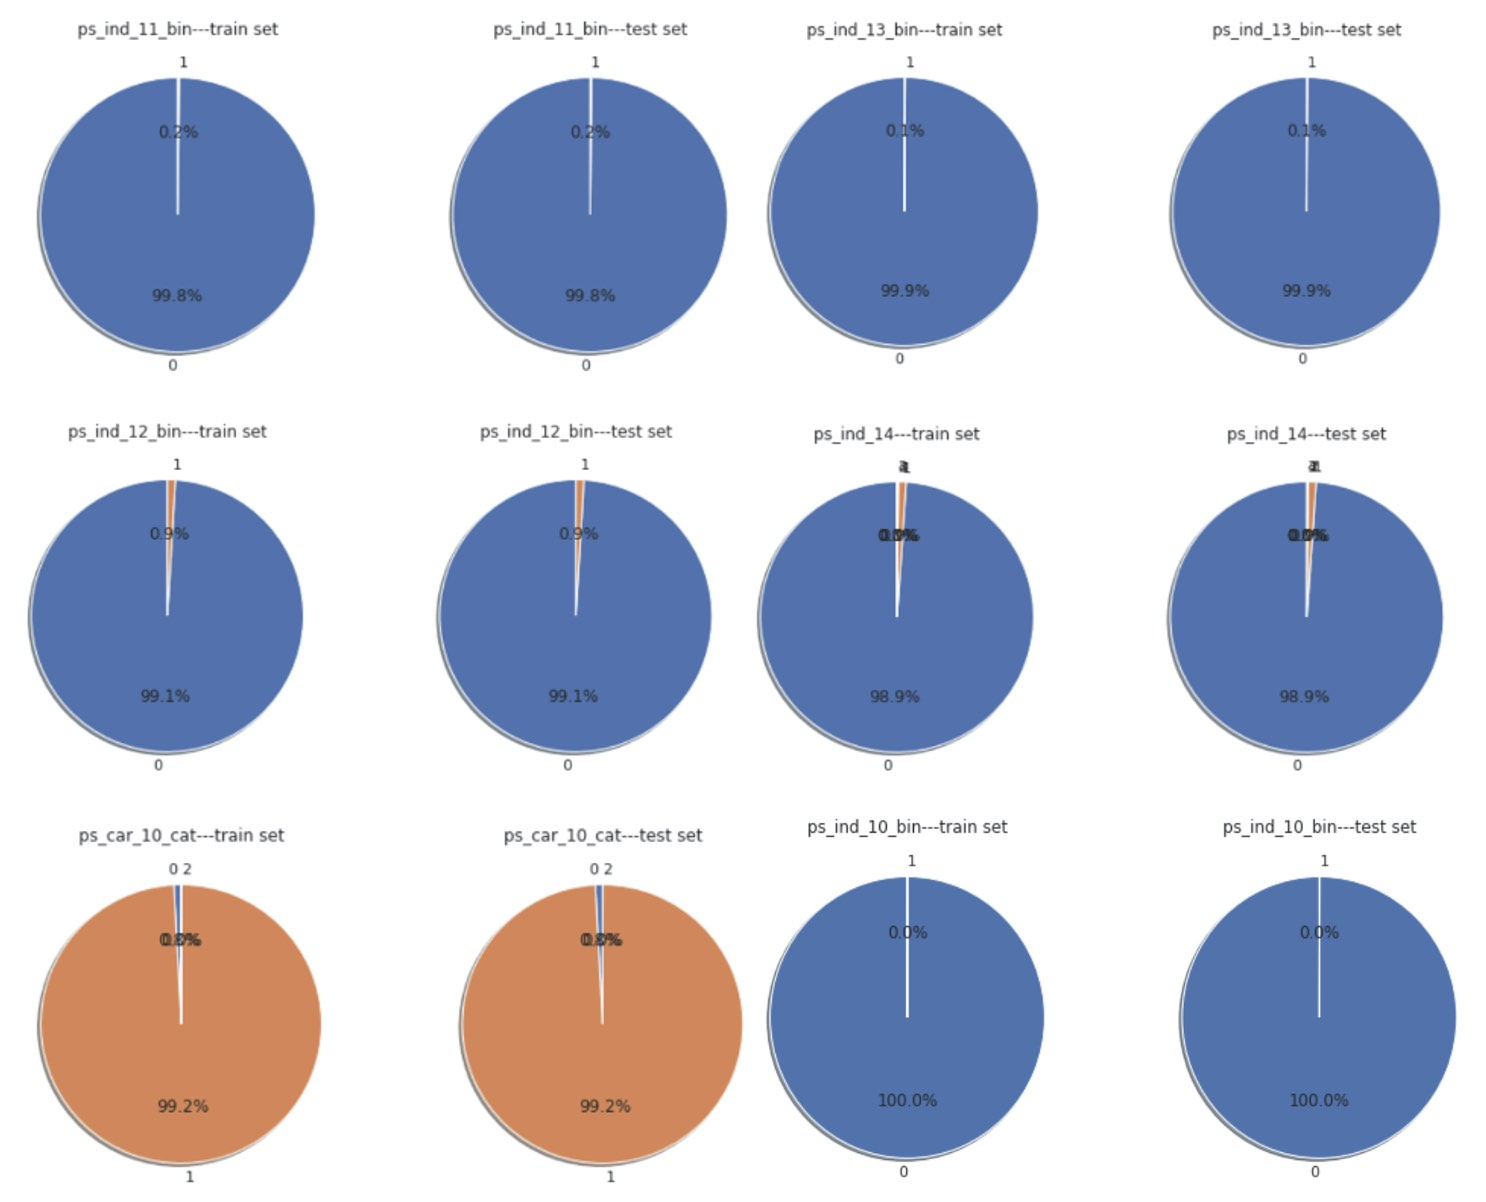

In [108]:
# We drop these 6 variables(ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin, ps_ind_14, ps_car_10_cat) in the train and test datasets. 

# Almost all the values in these 6 categorical variables are 0 or 1 and there is significant imbalance in their distribution.
# The variance of these 6 variables is extremely small, which indicates that these 6 variables are meaningless in the train and test datasets. 

train_df = train_df.drop(['ps_ind_10_bin','ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_car_10_cat'], axis=1)
test_df  = test_df.drop (['ps_ind_10_bin','ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_car_10_cat'], axis=1)

In [109]:
# Target encoding

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name

    temp = pd.concat([trn_series, target], axis=1)
    
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Calculate the mean of all targets
    prior = target.mean()

    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [110]:
train_encoded, test_encoded = target_encode(train_df["ps_car_11_cat"], 
                              test_df["ps_car_11_cat"], 
                              target=train_df.target, 
                              min_samples_leaf=100,
                              smoothing=10,
                              noise_level=0.01)

train_df["ps_car_11_cat_tar_enc"] = train_encoded.astype('float64')
test_df['ps_car_11_cat_tar_enc']  = test_encoded.astype('float64')

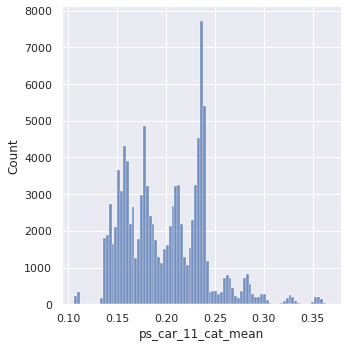

In [111]:
sns.displot(train_encoded)

In [112]:
# We drop the 'ps_car_11_cat' because we have already do the target encoding operation 

train_df = train_df.drop(['ps_car_11_cat'], axis=1)
test_df  = test_df.drop (['ps_car_11_cat'], axis=1)

In [113]:
# Concat the train_df and test_df

dataset = pd.concat([train_df,test_df],ignore_index=True)

Then, we analyze the correlation again for the continuous variables in both our training and test set using a correlation matrix. We observe that there are some variables with relatively high correlations.

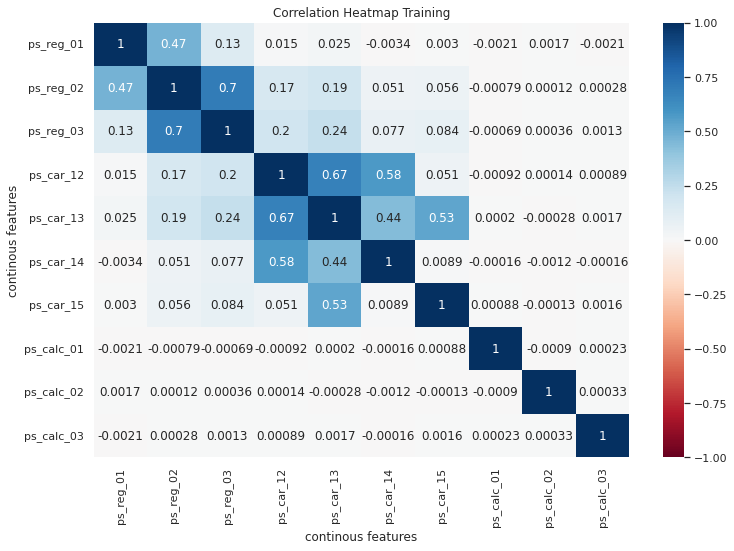

In [114]:
# As mentioned previously, the continuous variables are highly correlated.
# Therefore, we creat a correlation matrix for continuous variables in training dataset.

continoues_variables = dataset[['ps_reg_01','ps_reg_02','ps_reg_03','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03']]

sns.set(style = 'white')

corr_matrix = continoues_variables.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr_matrix,cmap = 'RdBu', annot=True, vmax = 1, vmin = -1, center = 0) 

plt.title ('Correlation Heatmap Training')
plt.xlabel('continous features')
plt.ylabel('continous features')
plt.show()

In [115]:
# Binning 

def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()

    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]

    # calculate woe
    woe = np.log(bad) - np.log(good)

    # calculate iv
    iv = (bad-good)*woe

    # calculate the iv for the whole feature
    f_iv = iv.sum()  
    if verbose == True:
        print(f"according to currrent intervals{max_intervals}，features{feat}calculated information value is：{f_iv}")
        print('='*80)

    # Mapping Opeartion
    dic = iv.to_dict()

    # Discretization of continuous variables
    iv_bins = feat_bins.map(dic)  

    return iv_bins.astype('float64')

In [116]:
for col in continoues_variables:
    dataset[f"{col}_woe"] = woe_iv_encoding(data = dataset, feat = col, target = 'target', max_intervals = 20)

Then we create a new interaction feature for the training and test data because we observed from our corrleation heatmap above that there are some variables that are highly correlated. The correlation between the variables will also have an interaction effect on the outcome(target). 

An example is that a feature x has a direct influence on z. Additionally a feature y has a direct influence on z. The interaction between x and y also influences z. 

In [117]:
# Based on the above anaylsis, we create new interaction features by PolynomialFeatures for the training data
from sklearn.preprocessing import PolynomialFeatures

continoues_variables_list = continoues_variables.columns

poly_features = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create interaction features
interactions_features = pd.DataFrame(data = poly_features.fit_transform(dataset[continoues_variables_list]), columns = poly_features.get_feature_names_out(continoues_variables_list))

# Remove the original columns
New_features = interactions_features.drop(continoues_variables_list, axis=1)  

print('Before interaction, there are {} variables in the dataset'.format(dataset.shape[1]))

# Concat the interaction variables to the train data
dataset = pd.concat([dataset, New_features], axis=1)
print('After interaction,  there are {} variables in the dataset'.format(dataset.shape[1]))

print('New features in dataset are',(New_features.columns).tolist())

Before interaction, there are 61 variables in the dataset
After interaction,  there are 106 variables in the dataset
New features in dataset are ['ps_reg_01 ps_reg_02', 'ps_reg_01 ps_reg_03', 'ps_reg_01 ps_car_12', 'ps_reg_01 ps_car_13', 'ps_reg_01 ps_car_14', 'ps_reg_01 ps_car_15', 'ps_reg_01 ps_calc_01', 'ps_reg_01 ps_calc_02', 'ps_reg_01 ps_calc_03', 'ps_reg_02 ps_reg_03', 'ps_reg_02 ps_car_12', 'ps_reg_02 ps_car_13', 'ps_reg_02 ps_car_14', 'ps_reg_02 ps_car_15', 'ps_reg_02 ps_calc_01', 'ps_reg_02 ps_calc_02', 'ps_reg_02 ps_calc_03', 'ps_reg_03 ps_car_12', 'ps_reg_03 ps_car_13', 'ps_reg_03 ps_car_14', 'ps_reg_03 ps_car_15', 'ps_reg_03 ps_calc_01', 'ps_reg_03 ps_calc_02', 'ps_reg_03 ps_calc_03', 'ps_car_12 ps_car_13', 'ps_car_12 ps_car_14', 'ps_car_12 ps_car_15', 'ps_car_12 ps_calc_01', 'ps_car_12 ps_calc_02', 'ps_car_12 ps_calc_03', 'ps_car_13 ps_car_14', 'ps_car_13 ps_car_15', 'ps_car_13 ps_calc_01', 'ps_car_13 ps_calc_02', 'ps_car_13 ps_calc_03', 'ps_car_14 ps_car_15', 'ps_car_14 

In both the training and test data, we printed out the new interaction features in the dataset. Below are the new interaction columns:
['ps_reg_01 ps_reg_02', 'ps_reg_01 ps_reg_03', 'ps_reg_01 ps_car_12', 'ps_reg_01 ps_car_13', 'ps_reg_01 ps_car_14', 'ps_reg_01 ps_car_15', 'ps_reg_01 ps_calc_01', 'ps_reg_01 ps_calc_02', 'ps_reg_01 ps_calc_03', 'ps_reg_02 ps_reg_03', 'ps_reg_02 ps_car_12', 'ps_reg_02 ps_car_13', 'ps_reg_02 ps_car_14', 'ps_reg_02 ps_car_15', 'ps_reg_02 ps_calc_01', 'ps_reg_02 ps_calc_02', 'ps_reg_02 ps_calc_03', 'ps_reg_03 ps_car_12', 'ps_reg_03 ps_car_13', 'ps_reg_03 ps_car_14', 'ps_reg_03 ps_car_15', 'ps_reg_03 ps_calc_01', 'ps_reg_03 ps_calc_02', 'ps_reg_03 ps_calc_03', 'ps_car_12 ps_car_13', 'ps_car_12 ps_car_14', 'ps_car_12 ps_car_15', 'ps_car_12 ps_calc_01', 'ps_car_12 ps_calc_02', 'ps_car_12 ps_calc_03', 'ps_car_13 ps_car_14', 'ps_car_13 ps_car_15', 'ps_car_13 ps_calc_01', 'ps_car_13 ps_calc_02', 'ps_car_13 ps_calc_03', 'ps_car_14 ps_car_15', 'ps_car_14 ps_calc_01', 'ps_car_14 ps_calc_02', 'ps_car_14 ps_calc_03', 'ps_car_15 ps_calc_01', 'ps_car_15 ps_calc_02', 'ps_car_15 ps_calc_03', 'ps_calc_01 ps_calc_02', 'ps_calc_01 ps_calc_03', 'ps_calc_02 ps_calc_03']

We implemented a PCA and calculated the cumulative explained variance ratio. We calculate the PCA in order to compute the principal components that can be used them to perfrom a change of basis on the data.

In [118]:
# Re-construct the train and test dataframe

train_df = dataset.loc[train_df.index]
test_df  = dataset.loc[test_df.index]

In [119]:
# Conduct 80/20 train-test split with random state = 10.

from sklearn.model_selection import train_test_split

# In the train dataset there are two columns, target and id. These are two variables that we will not be utilizing.
x_train = train_df.drop(['target','id'], axis=1)
y_train = train_df.target

# However, in the prediction test dataset there is no target column, only an id column. 
x_test_pred = test_df.drop(['target','id'], axis=1)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state=10)

In [120]:
# Import libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Intermediate step to address scale-invariance
scaler = StandardScaler()
scaler.fit(x_train)
scaler_x_train = scaler.transform(x_train)
scaler_x_valid = scaler.transform(x_valid)
scaler_x_test_pred = scaler.transform(x_test_pred)

# Instantiate and Fit PCA
pca = PCA(n_components = scaler_x_train.shape[1]) 
pca_x_train = pca.fit_transform(scaler_x_train)

In [121]:
# Calculating the Cumulative Explained Variance Ratio

explained_variance_ratios = pca.explained_variance_ratio_

cum_evr = np.cumsum(explained_variance_ratios)

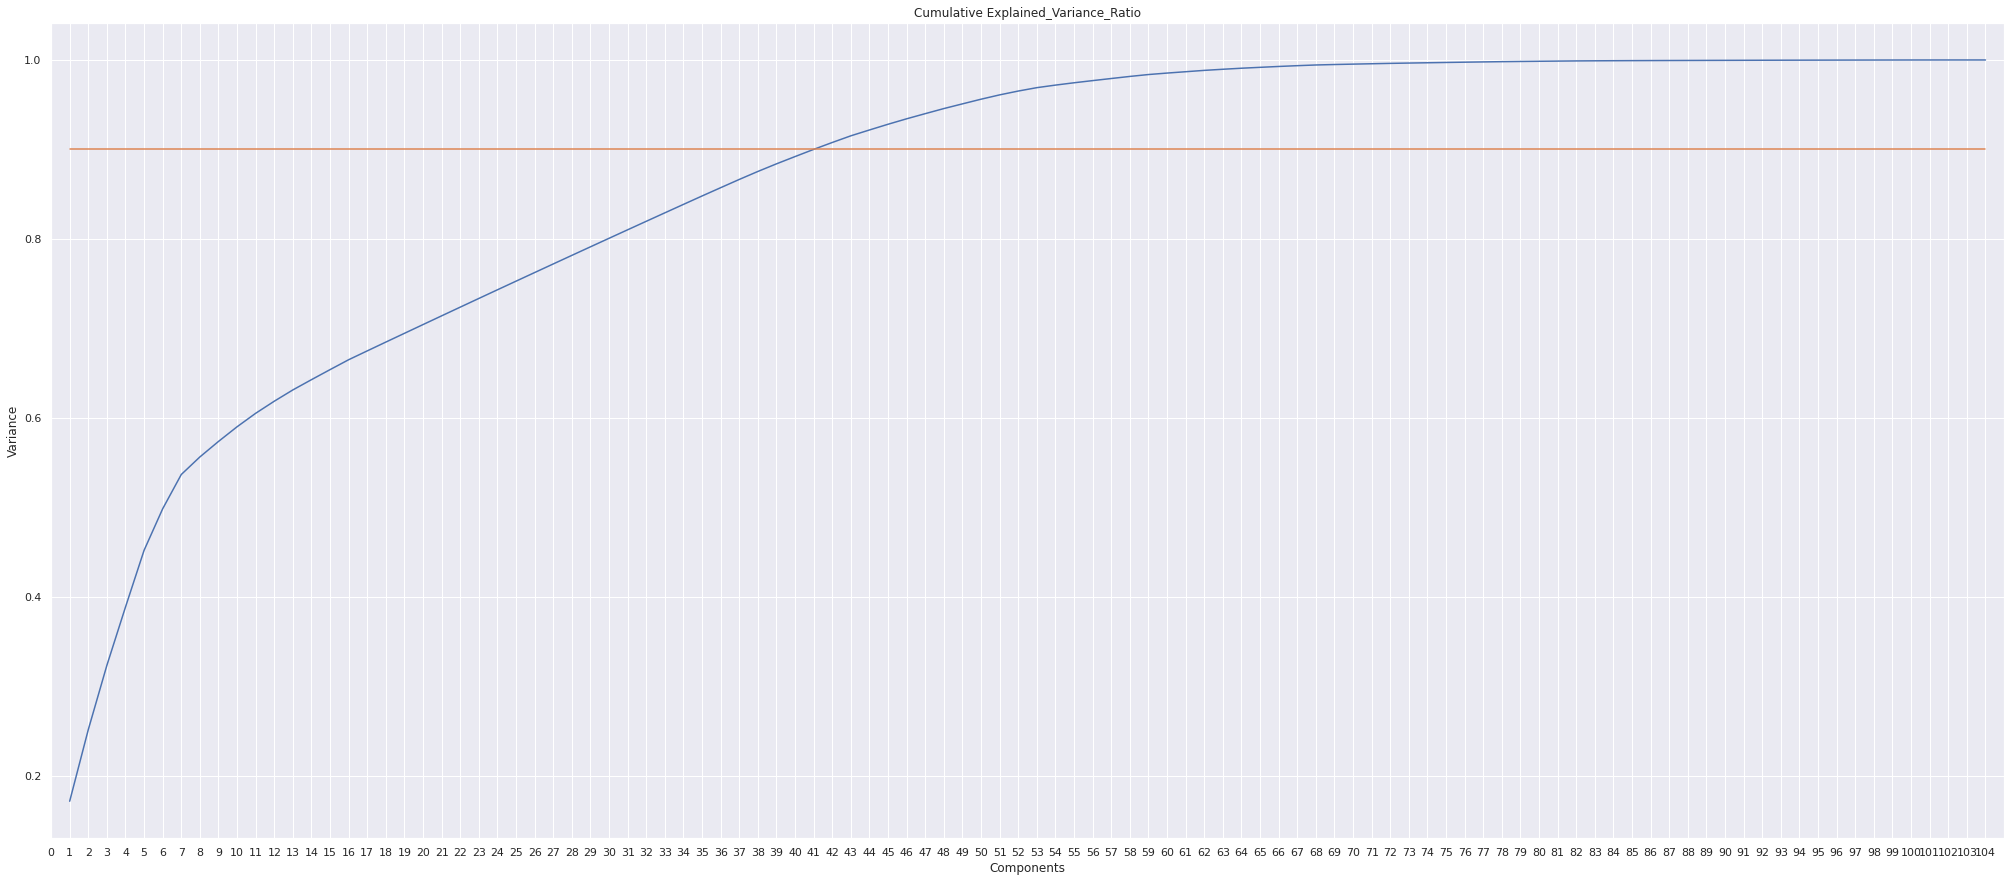

In [122]:
# Plotting the Cumulative Explained Variance Ratio

sns.set(rc={'figure.figsize':(35,15)})

x = list(range(0,105))
plt.xlim(0,105)
plt.xticks(x)

plt.plot(np.arange(1,105), cum_evr)
plt.plot(np.arange(1,105), [0.9]*104)

plt.title ('Cumulative Explained_Variance_Ratio')
plt.xlabel('Components')
plt.ylabel('Variance')
plt.show()

The implementation of the PCA. Our current PCA show an inflection point of around 10 with < 0.6 variance. Ideally, we would like the inflection earlier in the graph to be > 0.9. Thus, there is no pricinpal components in our model and the PCA should not be utilized in our project 


In [123]:
from xgboost import XGBClassifier
from xgboost import plot_importance

plt.figure(figsize = [100,20])

XXX = dataset.loc[train_df.index].drop(['id', 'target'], axis=1)
yyy = dataset.loc[train_df.index].target

model = XGBClassifier()

model.fit(XXX, yyy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<Figure size 7200x1440 with 0 Axes>

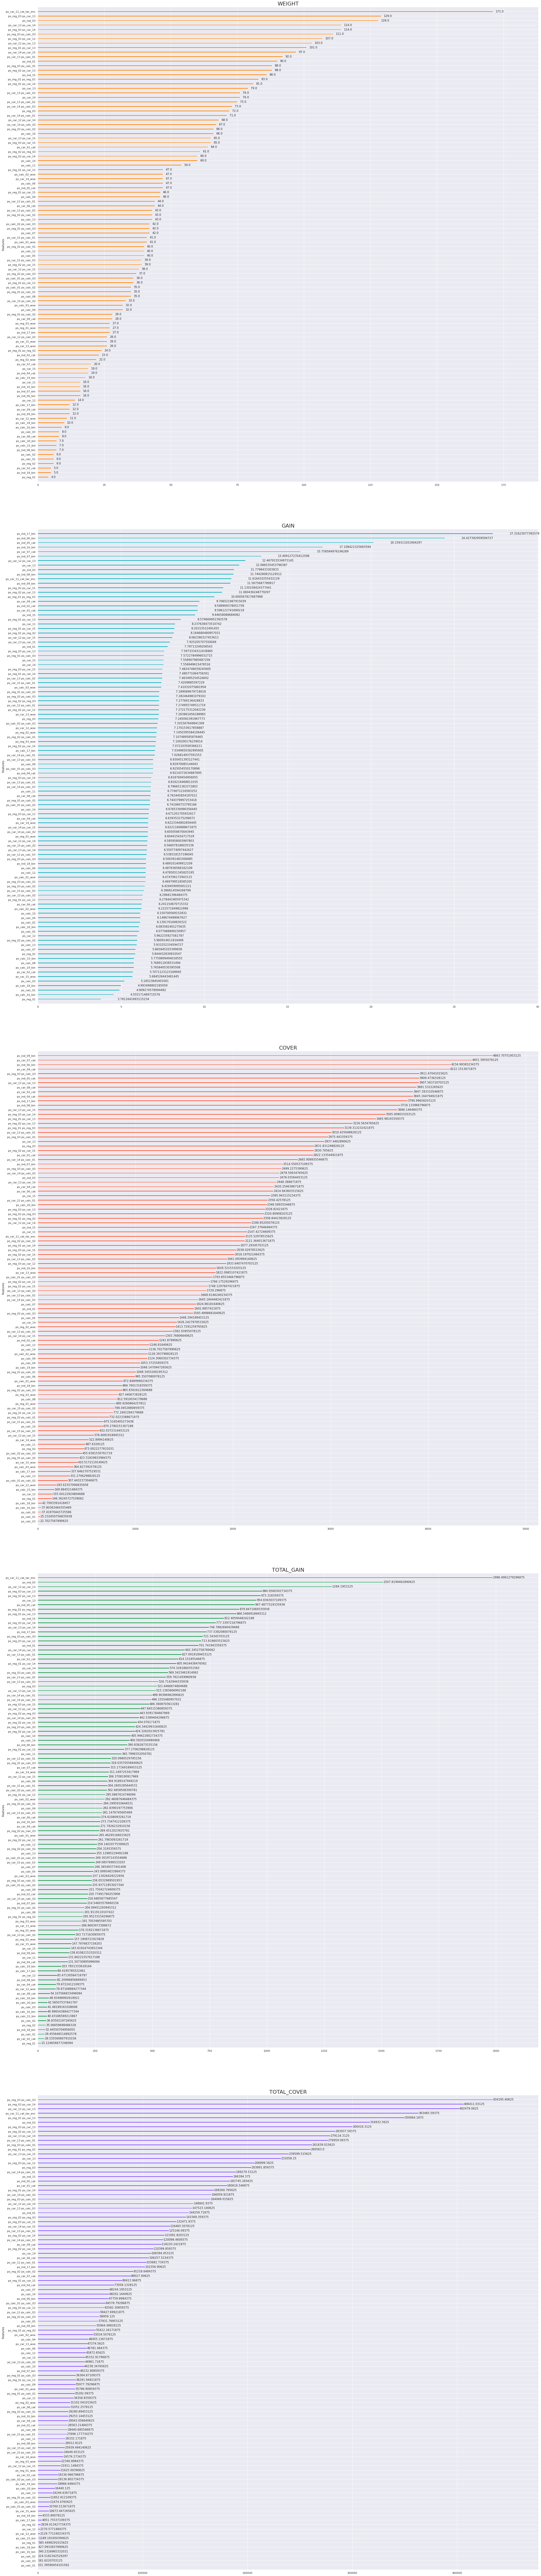

In [124]:
# define subplot grid

sns.set(rc={'figure.figsize':(10,10)})
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(30, 150))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']

# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

In [125]:
# Select the fearures based on different strategy

from sklearn.feature_selection import SelectFromModel

feat_dict = {}

for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'before the selection：{XXX.shape[1]} features')
    
    n_features = model_select.transform(XXX.values).shape[1]
    print(f'after the selction： {n_features} features【{thres}】')
    print('*'*45)
    selected_vars = list(XXX.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

before the selection：104 features
after the selction： 52 features【median】
*********************************************
before the selection：104 features
after the selction： 24 features【mean】
*********************************************
before the selection：104 features
after the selction： 15 features【1.25*mean】
*********************************************


In [126]:
# Construct the final train dataframe and test dataframe

train_df = dataset.loc[train_df.index][feat_dict['mean']+['target']]
test_df = dataset.loc[test_df.index][feat_dict['mean']]

# Modelling Construction

We decided to implement a XGB Classifier Model in order to predict the probability that a driver will initiate an auto insurance claim in the next year. We decided to use this classification model because we have a large number of observations and have a mixture of categorical and continuous variables in our dataset.

In [127]:
# Get the train data and the target

M = train_df.drop(['target'], axis=1)
n = train_df.target

In [128]:
# Create and implement XGB Classifier Model
# We do hyperparameter turing by using Grid Search

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# We try the belowing parameters one by one

p = {#'n_estimators': [300,400],
     #'max_depth': [4,5],
     'learning_rate': [0.07, 0.08],
     #'subsample': [0.8,1.0],
     #'min_child_weight': [5,6],
     #'colsample_bytree': [0.8,1.0],
     #'scale_pos_weight': [1.5, 1.6],
     #'gamma': [5, 10],
     #'reg_alpha': [8, 10],
     #'reg_lambda': [1,2]
     }

xgb = XGBClassifier(objective='binary:logistic')

# Initiating and fitting Grid Search

gsearch = GridSearchCV(xgb, param_grid=p, scoring='roc_auc')
gsearch.fit(M, n)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters:")
best_parameters = gsearch.best_estimator_.get_params()
for i in sorted(p.keys()):
    print("\t%s: %r" % (i, best_parameters[i]))

Best score: 0.633
Best parameters:
	learning_rate: 0.07


In [129]:
# After tuning, the combination of parameters

from xgboost import XGBClassifier
 
model = XGBClassifier(  n_estimators=400,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=0.07, 
                        subsample=0.8,
                        min_child_weight=6,
                        colsample_bytree=0.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=10,
                        reg_lambda=2,
                     )

# Performance Analysis

In this section, we conduct a performance analysis of the models that we created above. We calculate the accuracy, precision, recall, f1, roc_auc_score, and normalized gini coefficent for each of the models.

In [130]:
# We use the gini cofficient as our score metrics

def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

In [131]:
# We use 10 fold as our cross-validation

from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits = K, random_state = 1, shuffle = True)

np.random.seed(2023)

In [132]:
# Target encoding

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(trn_series=None,    
                  val_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):

    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)

    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])

    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # Calculate the mean of all targets
    prior = target.mean()

    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_val_series = pd.merge(
        val_series.to_frame(val_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=val_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    
    # pd.merge does not keep the index so restore it
    ft_val_series.index = val_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_val_series, noise_level), add_noise(ft_tst_series, noise_level)

In [133]:
# Define the XGB_gini

def XGB_gini(df_train,tar_enc = True):
    
    y = df_train.target
    X = df_train.drop('target',axis=1)
    
    
    y_valid_pred = 0*y
    y_test_pred = 0
    
    
    train = pd.concat([X,y],axis=1)
    for i, (train_index, test_index) in enumerate(kf.split(train)):

        # Splited into training dataset, validation dataset, and testing dataset

        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()        
        X_test = test_df.copy()
        
        print( f"\n{i} fold cross-validation： ")

        fit_model = model.fit( X_train, y_train )

        # Generate results for the validation dataset
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  normalized gini coefficent = ", eval_gini(y_valid, pred) )
        y_valid_pred.iloc[test_index] = pred

        # Accumulate the results for the testing dataset
        y_test_pred += fit_model.predict_proba(X_test)[:,1]

        del X_test, X_train, X_valid, y_train

    # Average of the results for each fold
    y_test_pred /= K  

    print( "final normalized gini coefficent = ", eval_gini(y, y_valid_pred) )
    
    return y_test_pred,eval_gini(y, y_valid_pred)

In [134]:
# Get the gini cofficient based on the 10 fold cross-validation

y_test_pred, gini_score = XGB_gini(df_train=train_df,tar_enc=True)


0 fold cross-validation： 
  normalized gini coefficent =  0.25175278001033585

1 fold cross-validation： 
  normalized gini coefficent =  0.2772163710513891

2 fold cross-validation： 
  normalized gini coefficent =  0.29010781700369737

3 fold cross-validation： 
  normalized gini coefficent =  0.2607363913356612

4 fold cross-validation： 
  normalized gini coefficent =  0.29304774987125615

5 fold cross-validation： 
  normalized gini coefficent =  0.2597681816346069

6 fold cross-validation： 
  normalized gini coefficent =  0.2701781282442295

7 fold cross-validation： 
  normalized gini coefficent =  0.27156521569443726

8 fold cross-validation： 
  normalized gini coefficent =  0.26745508818741714

9 fold cross-validation： 
  normalized gini coefficent =  0.30010641644101477
final normalized gini coefficent =  0.2739867374182955


# Predication Based on Test Dataset

In this section, we present the predictions beased on the test data using the XGB Model. 

In [135]:
# The fianl prediction of the target values using the Decision Tree Classifier Model on the test dataset.

Final_Output = pd.DataFrame()
Final_Output['id'] = test_df.index.values
Final_Output['target'] = y_test_pred
Final_Output.head(50)

id    target
0    0  0.272486
1    1  0.238831
2    2  0.246532
3    3  0.424503
4    4  0.234599
5    5  0.327498
6    6  0.331749
7    7  0.228633
8    8  0.395088
9    9  0.140669
10  10  0.129197
11  11  0.220231
12  12  0.253116
13  13  0.507944
14  14  0.346400
15  15  0.384088
16  16  0.424246
17  17  0.223171
18  18  0.286981
19  19  0.254798
20  20  0.367978
21  21  0.218978
22  22  0.332166
23  23  0.269362
24  24  0.202027
25  25  0.222737
26  26  0.204383
27  27  0.288046
28  28  0.238524
29  29  0.235158
30  30  0.243964
31  31  0.138589
32  32  0.410675
33  33  0.156317
34  34  0.344407
35  35  0.354201
36  36  0.346785
37  37  0.230062
38  38  0.254192
39  39  0.384748
40  40  0.281551
41  41  0.423478
42  42  0.148838
43  43  0.298605
44  44  0.253090
45  45  0.148556
46  46  0.375905
47  47  0.260365
48  48  0.448189
49  49  0.214255

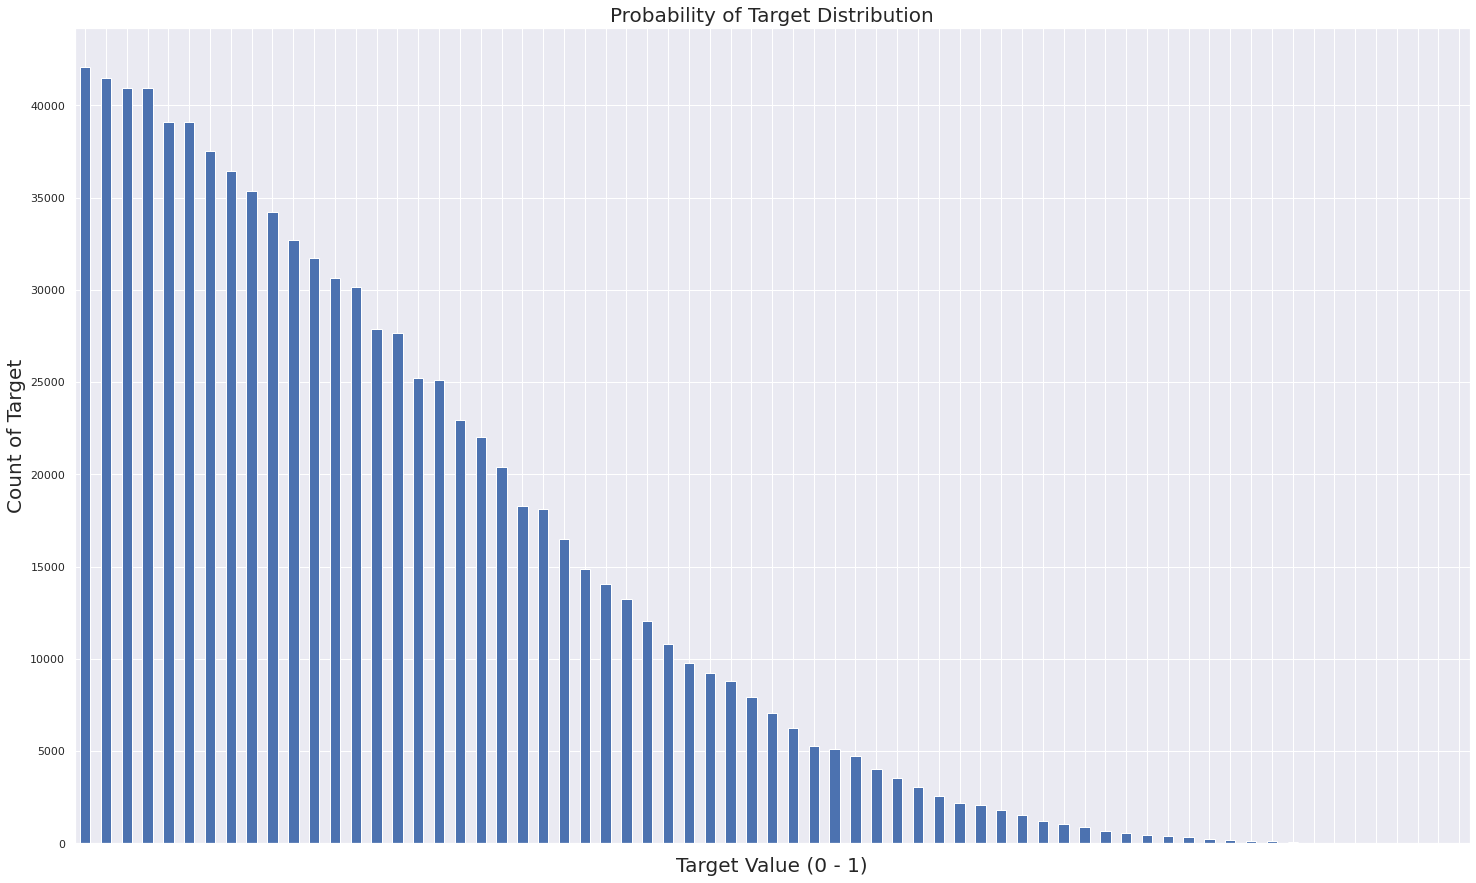

In [136]:
# Below is a visualization of the predicted target based on the dataframe above.

sns.set(rc={'figure.figsize':(25,15)})
ax = Final_Output['target'].round(2).value_counts().plot.bar()
ax.set_xticklabels([])
plt.title ('Probability of Target Distribution',fontsize= 20)
plt.xlabel('Target Value (0 - 1)',fontsize= 20)
plt.ylabel('Count of Target', fontsize= 20)
plt.show()

Above is a plot displaying the probability distribution of the preducted target using the XGB model that we implemented. 

# Conclusion/Findings

The above presentation of our project displays the real-life value proposition of how datasets and data analysis could provide a cost-effective method increase the accuracy of auto insurance pricing and increase trust of drivers. Specifically for the company data that we analyzed, Proto Seguro could use the predicitve model in order to charge their customers fairly and make insurance coverage more accessible to more customers.

# Challenges/Obstacles

There were serveral challenges that we faced throughout the project. Below are some of the challenges:
* A major challenge for us throughout the project was the fact that the dataset that we were provided from the Kaggle Competition did not have a dictionary of all of the features. This made it hard to understand the meaning of the columns and come up with real life applications since none of the features were disclosed. This also made it harder for us to explore the data.

* Another challenge that we faced is we tried to do hyperparameter tunings by using Grid Search. However, the compution time is extremely intense, summing up to multiple hours or days.

# Potential Next Steps

Although we completed the project if we were to do it again or continue deeping our insights, we would have implemented/changed the following:
* Finding the Feature Meaning: We would have liked to consult someone from Porto Seguro if they could disclose a dictionary for the features of the dataset because this would have helped us get a better understanding of the data that we are working with. Additionally, it could give us insights into potential strategies to increase the performance of our models in order to ultimately draw concrete conclusions.
* Implementing Other Models: We also would have liked to implement other models to see how they would compare in terms of performance. We would have liked to build a stochastic gradient decent model with a large number of epoches and a learning rate decay after every epoch. We were unable to implement this model because of our computational power and understanding of the implementation. We would have also like to learn more about the LightGBM framework as a potential way to expond on our use of decision trees. We think this would be more efficent as it reduces memory usage. We explored the potential of other models after implementing our models above and if given more time would have liked to fully develope the other models to compare performance.